# Joining, Reshaping, and Visualizing Data

In this tutorial, we will learn about joining data with `dplyr`, pivoting data frame with `tidyr`, and data visualization with `ggplot2`. These three packages are the most widely used packages within the `tidyverse` for data analysis.

# Joining Data Frames

To demonstrate joining data, let's create two simple data frames, one with customer purchases and
the other with product information. The connection between these two data frames is the `product_id` variable. 

Within `dplyr` syntax, `product_id` is called a **key variable**.

Before we can begin, we must load the `tidyverse` package.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
purchases <- tibble(customer_id = c(45, 12, 100, 100, 54, 25),
                    product_id = c(1, 1, 3, 5, 6, 1))

products <- tibble(product_id = c(1, 2, 3, 4, 5, 6),
                 product_type = c("Tennis ball", "Soccer ball", "Hockey puck",
                                  "Football", "Basketball", "Baseball"),
                 price = c(1.25, 22.25, 8.75, 15.25, 17.25, 7.25))


In [3]:
# View data
purchases


customer_id,product_id
<dbl>,<dbl>
45,1
12,1
100,3
100,5
54,6
25,1


<br>



In [4]:
products


product_id,product_type,price
<dbl>,<chr>,<dbl>
1,Tennis ball,1.25
2,Soccer ball,22.25
3,Hockey puck,8.75
4,Football,15.25
5,Basketball,17.25
6,Baseball,7.25


## Mutating Joins
First we will focus on **mutating joins**. A mutating join allows you to combine variables from two data frames. Observations are matched by their values on the key variable.

To visualize joins, lets use the simple tables **x** and **y** represented below. These tables are related by a key column (the first column in both tables - let's call it "key"). The second column of each table contains the data we are interested in combining in various ways.

<p align="center">
<img 
   src="./files/join_setup.png"
   width="200"
/img>
</p>

<br>
Image source:

[R for Data Science](https://r4ds.had.co.nz/)

## Left Joins
The syntax for a left join is as follows:

```
left_join(A, B, by = "key")
```

A left join will return all rows from `A`, and all columns that appear in both `A` and `B`.  
Rows in `A` with no match in `B` on the key variable are returned as missing (`NA`) values.  
Rows in `A` with multiple matches in `B` will be duplicated.  

In the image below, we are executing the following _**dplyr**_ code:

_**left_join(x, y, by = "key")**_

<p align="center">
<img 
   src="./files/join_left.png"
   width="450"
/img>
</p>

<br>
Image source:

[R for Data Science](https://r4ds.had.co.nz/)

In [5]:
# Bring in product information to purchases data
left_join(purchases, products, by = "product_id")

customer_id,product_id,product_type,price
<dbl>,<dbl>,<chr>,<dbl>
45,1,Tennis ball,1.25
12,1,Tennis ball,1.25
100,3,Hockey puck,8.75
100,5,Basketball,17.25
54,6,Baseball,7.25
25,1,Tennis ball,1.25


In [6]:
# Bring in purchase data to product table
left_join(products, purchases, by = "product_id")

product_id,product_type,price,customer_id
<dbl>,<chr>,<dbl>,<dbl>
1,Tennis ball,1.25,45
1,Tennis ball,1.25,12
1,Tennis ball,1.25,25
2,Soccer ball,22.25,NA
3,Hockey puck,8.75,100
4,Football,15.25,NA
5,Basketball,17.25,100
6,Baseball,7.25,54


<br>
<br>

We can also use the `select()` function to only join a subset of a data frame.


In [7]:
# Bring in product prices only
left_join(purchases, 
          products %>% select(product_id, price), 
          by = "product_id")

customer_id,product_id,price
<dbl>,<dbl>,<dbl>
45,1,1.25
12,1,1.25
100,3,8.75
100,5,17.25
54,6,7.25
25,1,1.25


## Right Joins

The syntax for a right join is as follows:

```
right_join(A, B, by = "key")
```

A right join will return all rows from `B`, and all columns that appear in both `A` and `B`.  
Rows in `B` with no match in `A` on the key variable are returned as missing (`NA`) values.  
Rows in `B` with multiple matches in `A` will be duplicated. 

In the image below, we are executing the following _**dplyr**_ code:

_**right_join(x, y, by = "key")**_

<p align="center">
<img 
   src="./files/join_right.png"
   width="450"
/img>
</p>

<br>
Image source:

[R for Data Science](https://r4ds.had.co.nz/)

<br>
Any right join can also be written as a left join. Let's see some examples of right joins.

In [8]:
# Bring in product information to purchases data
right_join(products, purchases, by = "product_id")

product_id,product_type,price,customer_id
<dbl>,<chr>,<dbl>,<dbl>
1,Tennis ball,1.25,45
1,Tennis ball,1.25,12
1,Tennis ball,1.25,25
3,Hockey puck,8.75,100
5,Basketball,17.25,100
6,Baseball,7.25,54


In [9]:
# Bring in purchase data to product table
right_join(purchases, products, by = "product_id")

customer_id,product_id,product_type,price
<dbl>,<dbl>,<chr>,<dbl>
45,1,Tennis ball,1.25
12,1,Tennis ball,1.25
100,3,Hockey puck,8.75
100,5,Basketball,17.25
54,6,Baseball,7.25
25,1,Tennis ball,1.25
NA,2,Soccer ball,22.25
NA,4,Football,15.25


## Inner Joins

The syntax for an inner join is as follows:

```
inner_join(A, B, by = "key")
```

An inner join will return all rows from `A` where there are matching key values in `B`, and all columns that appear in both `A` and `B`.  
If there are multiple matches between `A` and `B`, all combinations of these matches are returned

In the image below, we are executing the following _**dplyr**_ code:

_**inner_join(x, y, by = "key")**_

<p align="center">
<img 
   src="./files/join_inner.png"
   width="480"
/img>
</p>

<br>
Image source:

[R for Data Science](https://r4ds.had.co.nz/)

In [10]:
# All observations in products and purchases with all combinations
inner_join(products, purchases, by = "product_id")

product_id,product_type,price,customer_id
<dbl>,<chr>,<dbl>,<dbl>
1,Tennis ball,1.25,45
1,Tennis ball,1.25,12
1,Tennis ball,1.25,25
3,Hockey puck,8.75,100
5,Basketball,17.25,100
6,Baseball,7.25,54


In [11]:
# Same result, just ordered differently
inner_join(purchases, products, by = "product_id")

customer_id,product_id,product_type,price
<dbl>,<dbl>,<chr>,<dbl>
45,1,Tennis ball,1.25
12,1,Tennis ball,1.25
100,3,Hockey puck,8.75
100,5,Basketball,17.25
54,6,Baseball,7.25
25,1,Tennis ball,1.25


## Full Joins

The syntax for a full join is as follows:

```
full_join(A, B, by = "key")
```

A full join will return all rows and all columns from both `A` and `B`. Where there are no matching key values, an `NA` is returned. 

In the image below, we are executing the following _**dplyr**_ code:

_**full_join(x, y, by = "key")**_

<p align="center">
<img 
   src="./files/join_full.png"
   width="480"
/img>
</p>

<br>
Image source:

[R for Data Science](https://r4ds.had.co.nz/)

In [12]:
# Returning all observations in both tables
full_join(products, purchases, by = "product_id")

product_id,product_type,price,customer_id
<dbl>,<chr>,<dbl>,<dbl>
1,Tennis ball,1.25,45
1,Tennis ball,1.25,12
1,Tennis ball,1.25,25
2,Soccer ball,22.25,NA
3,Hockey puck,8.75,100
4,Football,15.25,NA
5,Basketball,17.25,100
6,Baseball,7.25,54


## Filtering Joins
Next, we will discuss **filtering joins**. Mutating joins allowed us to combine variables from two tables, but if matching key values were not found, then a missing (`NA`) value was generated. Filtering joins are desgined to remove data were there are no matching key values across tables. Also, filtering joins will not duplicate key values with multiple matches across tables.

## Semi Joins

The syntax for a semi join is as follows:

```
semi_join(A, B, by = "key")
```

A semi join will return all rows from `A` where there are matching key values in `B`, keeping just the columns from `A`. 

A semi join differs from an inner join. An inner join will return one row of `A` for each matching row of `B`. A semi join will never duplicate rows of `A`.

In the image below, we are executing the following _**dplyr**_ code:

_**semi_join(x, y, by = "key")**_

<p align="center">
<img 
   src="./files/join_semi.png"
   width="480"
/img>
</p>

<br>
Image source:

[R for Data Science](https://r4ds.had.co.nz/)

In [15]:
# All rows in products that also appeared in purchases (by product_id)
semi_join(products, purchases, by = "product_id")

product_id,product_type,price
<dbl>,<chr>,<dbl>
1,Tennis ball,1.25
3,Hockey puck,8.75
5,Basketball,17.25
6,Baseball,7.25


In [16]:
# All rows in purchases that also appear in products (by product_id)
semi_join(purchases, products, by = "product_id")

customer_id,product_id
<dbl>,<dbl>
45,1
12,1
100,3
100,5
54,6
25,1


## Anti Joins

The syntax for an anti join is as follows:


```
anti_join(A, B, by = "key")
```

An anti join will return all rows from `A` where there are no matching key values in `B`, keeping just the columns from `A`. 

In the image below, we are executing the following _**dplyr**_ code:

_**anti_join(x, y, by = "key")**_

<p align="center">
<img 
   src="./files/join_anti.png"
   width="480"
/img>
</p>

<br>
Image source:

[R for Data Science](https://r4ds.had.co.nz/)


In [17]:
# All rows in products that did not appear in purchases (by product_id)
anti_join(products, purchases, by = "product_id")

product_id,product_type,price
<dbl>,<chr>,<dbl>
2,Soccer ball,22.25
4,Football,15.25


In [18]:
# All rows in purchases that did not appear in products (by product_id)
# We get an empty data frame in this case
anti_join(purchases, products, by = "product_id")

customer_id,product_id
<dbl>,<dbl>


## Key Variables With Different Column Names

Often times when joining data frames together, the key variable that links multiple datasets together may have different names in the various data frames. See the example data frames below where a unique country identifier, the ISO3 code, appears as 'country_code' in a different table. To join the sample data frames below, we must specify the input to the `by` argument as follows: 
<br>


```
by = c("key value name in first table" = "key value name in second table")
```

In [20]:
# Country table 1
countries_1 <- tibble(ISO3 = c("AFG", "IND", "CHN", "USA"),
                      population_millions = c(37.21, 1368.73, 1420.06, 329.1))

# Country table 2
countries_2 <- tibble(country_code = c("AFG", "IND", "CHN", "USA"),
                      country_name = c("Afghanistan", "India", "China", 
                                       "United States"))

In [24]:
# View data
countries_1

ISO3,population_millions
<chr>,<dbl>
AFG,37.21
IND,1368.73
CHN,1420.06
USA,329.10


In [22]:
countries_2

country_code,country_name
<chr>,<chr>
AFG,Afghanistan
IND,India
CHN,China
USA,United States


<br>

The code below demonstrates how to join these data frames.

In [23]:
left_join(countries_1, countries_2,
          by = c("ISO3" = "country_code"))

ISO3,population_millions,country_name
<chr>,<dbl>,<chr>
AFG,37.21,Afghanistan
IND,1368.73,India
CHN,1420.06,China
USA,329.10,United States


## Composite Key Variables

A composite key is a combination of variable values that uniquely identify a row within a data frame. In the sample data frames that are created below, the composite keys for `patients_1` and `patients_2` are `first_name, last_name, date_of_birth` and `first, last, date_of_birth`. To join these patient records, we extend our inputs to the `by` argument as demonstrated below.

In [25]:
# patients_1
patients_1 <- tibble(first_name = c("Mia", "Vivian", "Vivian", "Tyler"),
                     last_name = c("Wallace", "Ward", "Ward", "Durden"),
                     date_of_birth = c("05-12-1994", "06-02-1990", 
                                       "08-04-1994", "05-28-1999"),
                     gender = c("female", "female", "female", "male"))

<br>



In [26]:
# patients_2
patients_2 <- tibble(first = c("Tyler", "Mia", "Vivian", "Vivian"),
                     last = c("Durden", "Wallace", "Ward", "Ward"),
                     date_of_birth = c("05-28-1999", "05-12-1994", 
                                       "06-02-1990", "08-04-1994"),
                     blood_pressure = c("140/85", "130/86", "110/72", "120/80"))

In [27]:
patients_1

first_name,last_name,date_of_birth,gender
<chr>,<chr>,<chr>,<chr>
Mia,Wallace,05-12-1994,female
Vivian,Ward,06-02-1990,female
Vivian,Ward,08-04-1994,female
Tyler,Durden,05-28-1999,male


In [28]:
patients_2

first,last,date_of_birth,blood_pressure
<chr>,<chr>,<chr>,<chr>
Tyler,Durden,05-28-1999,140/85
Mia,Wallace,05-12-1994,130/86
Vivian,Ward,06-02-1990,110/72
Vivian,Ward,08-04-1994,120/80


In [29]:
# Combining the data
left_join(patients_1, patients_2,
          by = c("first_name" = "first", 
                 "last_name" = "last", 
                 "date_of_birth" = "date_of_birth"))

first_name,last_name,date_of_birth,gender,blood_pressure
<chr>,<chr>,<chr>,<chr>,<chr>
Mia,Wallace,05-12-1994,female,130/86
Vivian,Ward,06-02-1990,female,110/72
Vivian,Ward,08-04-1994,female,120/80
Tyler,Durden,05-28-1999,male,140/85


# Stacking Data Frames

## Stacking Rows

To stack two or more data frames vertically by row, we can use the `bind_rows()` function from the `dplyr` package. This task is common when an analyst needs to combine data from multiple sources. For `bind_rows()` to work properly, all input data frames should contain the same variables (column names), but not necessarily in the same order.

In the example below, we have two sample data sets that correspond to sales revenue from two different store locations. Our goal is to place the data into one file which can be used for data analysis in the future.

If we supply input to the optional `.id` argument of `bind_rows()`, it will create an ID variable in the combined data frame and name that variable with what we have provided. The ID variable is created as a sequence starting at 1 and ending at the total number of data frames that are being combined.

In [30]:
# Sample data 1
store_a <- tibble(day = c("Monday", "Tuesday", "Wednesday"),
                  date = c("02-04-2019", "02-05-2019", "02-06-2019"),
                  sales = c(120452, 574632, 329342))

In [31]:
# Sample data 2
store_b <- tibble(day = c("Monday", "Tuesday", "Thursday"),
                  date = c("02-04-2019", "02-05-2019", "02-07-2019"),
                  sales = c(750452, 974332, 527342))

In [32]:
store_a

day,date,sales
<chr>,<chr>,<dbl>
Monday,02-04-2019,120452
Tuesday,02-05-2019,574632
Wednesday,02-06-2019,329342


In [33]:
store_b

day,date,sales
<chr>,<chr>,<dbl>
Monday,02-04-2019,750452
Tuesday,02-05-2019,974332
Thursday,02-07-2019,527342


<br>
<br>


In [34]:
combined_data <- bind_rows(store_a, store_b,
                           .id = "store")

In [35]:
# View results
combined_data

store,day,date,sales
<chr>,<chr>,<chr>,<dbl>
1,Monday,02-04-2019,120452
1,Tuesday,02-05-2019,574632
1,Wednesday,02-06-2019,329342
2,Monday,02-04-2019,750452
2,Tuesday,02-05-2019,974332
2,Thursday,02-07-2019,527342


In [36]:
# Without creating an ID variable
bind_rows(store_a, store_b)

day,date,sales
<chr>,<chr>,<dbl>
Monday,02-04-2019,120452
Tuesday,02-05-2019,574632
Wednesday,02-06-2019,329342
Monday,02-04-2019,750452
Tuesday,02-05-2019,974332
Thursday,02-07-2019,527342


## Stacking Columns

To stack two or more data frames horizontally by columns, we can use the `bind_cols()` function from the `dplyr` package. 

In [37]:
# Store A profit
store_a_profit <-tibble(profit = c(80578, 420145, 247587))

In [38]:
# Add this column to store_a data frame
store_a_combined <- bind_cols(store_a, store_a_profit)

In [39]:
store_a_combined

day,date,sales,profit
<chr>,<chr>,<dbl>,<dbl>
Monday,02-04-2019,120452,80578
Tuesday,02-05-2019,574632,420145
Wednesday,02-06-2019,329342,247587


# Reshaping Data

The `tidyr` package is useful for transforming data frames from long and wide formats based on key-value pairs. The functions we will be using from `tidyr` include `pivot_wider()` and `pivot_longer()`. 

Intuitively, `pivot_wider()` is used to transform the values of a data frame variable into multiple columns (long to wide format). Conversely, `pivot_longer()` is used to collapse multiple columns into a single variable (wide to long format).

The `tidyr` package contains 5 sample data frames, `table1`, `table2`, `table3`, `table4a`, and `table4b`, that have the same data on the prevalence of a disease in Afghanistan, Brazil, and China (just in different formats). They are loaded to your `R` session when you import the `tidyverse` package.

<br>

## Long to Wide

To demonstrate the `pivot_wider()` function, we will be working with the `table2` data frame. Let's first have a look at the data.


In [40]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


<br>

The `pivot_wider()` function takes many arguments as input, but the 4 most important ones are listed below.

- `data` - a data frame to pivot  
- `names_from` - the quoted column name in `data` whose distinct values will be spread into multiple columns  
- `values_from` - the quoted column name in `data` with the corresponding values associated with the `names_from` column
- `values_fill` - default is `NA`. If a name-value pair is missing, this is what the result is filled with 

Let's see an example. The figure below is a visualization of the `pivot_wider()` function applied to the `table2` data frame. Here we pivot the unique values of the `type` variable into their own columns and fill them with the corresponding values from the `count` column.

In [41]:
# Pivot unique values of "type" variable into multiple columns
pivot_wider(table2, names_from = 'type', values_from = 'count')

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Wide to Long

When it is your goal to convert from wide to long format, use the `pivot_longer()` function. The `pivot_longer()` function takes a data frame and collapses multiple columns into a single column. 

The `pivot_longer()` function takes many arguments as input, but the 4 most important ones are listed below.

- `data` - a data frame to pivot
- `cols` - a vector of columns names (either quoted or raw) to pivot into a single variable
- `names_to` - a string specifying the name of the column to create from the columns in the `cols` argument   
- `values_to` - a string specifying the name of the column to create from the associated values of the columns in the `cols` argument

To demonstrate the `pivot_longer()` function we will be using `table1`. 

This table contains the same data as `table2`, just in a different format.

In [42]:
# View the data
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


<br>

Let's say that we need to collect the `cases` and `population` columns into a single column that we want to name `value_type` and the associated values into a column named `total_count`. The code below achieves this task.

In [43]:
pivot_longer(table1, cols = c(cases, population), 
             names_to = 'value_type', 
             values_to = 'total_count')

country,year,value_type,total_count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


<br>

The `tidyr` package can be used to perform a wide range of complex data re-structuring tasks. This is an important skill to develop if you plan on working with data and I recommend that you go through all of the examples in the [tidyr documentation](https://tidyr.tidyverse.org/articles/pivot.html)

# Data Visualization

This section will cover the basics of data visualization with `ggplot2`. Most of the data visualizations that you will be required to produce follow the same general template, displayed below. 

To create different types of graphics with `ggplot2`, such as scatter plots or bar graphs, you will only need to adjust the input in brackets with the appropriate input or functions.

`ggplot2` makes use of the `+` operator. This is **not** the addition operator that is used in base `R`. 

Since `ggplot2` was created before `dplyr`, the `+` operator was used instead of the `%>%` operator, but within `ggplot2`, the `+` operator functions the same way as `%>%` functions in `dplyr`. 

```
ggplot(data = [DATA], mapping = aes([MAPPING]) +
         [GEOM_FUNCTION]() +
         [FACET_FUNCTION]() +
         [COORDINATE_FUNCTION]() +
         labs(title = [TITLE],
              x = [X AXIS LABEL],
              y = [Y AXIS LABEL])
```

<br>

We will be creating data visualizations using a data frame that contains information on patients in a heart disease study. The data is loaded with the code below. Each row in this data frame represents a patient and their outcomes on medical tests. Each patient eventually did or did not develop heart disease. This is captured by the `heart_disease` variable.

In [44]:
heart_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/heart_disease.rds'))

# View the data
heart_df

patient_id,heart_disease,age,gender,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiograph,max_heart_rate,exercise_angina,old_peak,slope,vessel_fluoroscopy,thalassemia
<dbl>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<int>,<fct>
1001,no,63,male,typical,145,233,greater_120_mg,ventricular_hypertrophy,150,no,2.3,downsloping,0,fixed_defect
1002,yes,67,male,asymptomatic,160,286,less_120_mg,ventricular_hypertrophy,108,yes,1.5,flat,3,normal
1003,yes,67,male,asymptomatic,120,229,less_120_mg,ventricular_hypertrophy,129,yes,2.6,flat,2,reversible_defect
1004,no,37,male,non_anginal,130,250,less_120_mg,normal,187,no,3.5,downsloping,0,normal
1005,no,41,female,atypical,130,204,less_120_mg,ventricular_hypertrophy,172,no,1.4,upsloping,0,normal
1006,no,56,male,atypical,120,236,less_120_mg,normal,178,no,0.8,upsloping,0,normal
1007,yes,62,female,asymptomatic,140,268,less_120_mg,ventricular_hypertrophy,160,no,3.6,downsloping,2,normal
1008,no,57,female,asymptomatic,120,354,less_120_mg,normal,163,yes,0.6,upsloping,0,normal
1009,yes,63,male,asymptomatic,130,254,less_120_mg,ventricular_hypertrophy,147,no,1.4,flat,1,reversible_defect


## Scatter Plots

### Simple Scatter Plot

I will introduce each bracketed parameter in the template above by building a series of scatter plots that adds on each layer. We will be using the Heart Disease data set.

The code below produces a simple scatter plot. The data parameter in `ggplot()` takes the data frame that contains your data. The `aes()` option in the mapping parameter stands for aesthetic mapping. 

Below we are telling `ggplot()` to map the `age` column values in `heart_df` to the x-axis and the `cholesterol` column values to the y-axis. This produces (x,y) pairs that are mapped to coordinates on the graph.

Finally, we add the `geom_point()` function which tells `ggplot` that you would like points to be displayed on the coordinate mappings you have created.


In [56]:
# This code adjust the figure output size
options(repr.plot.width=11, repr.plot.height=7)

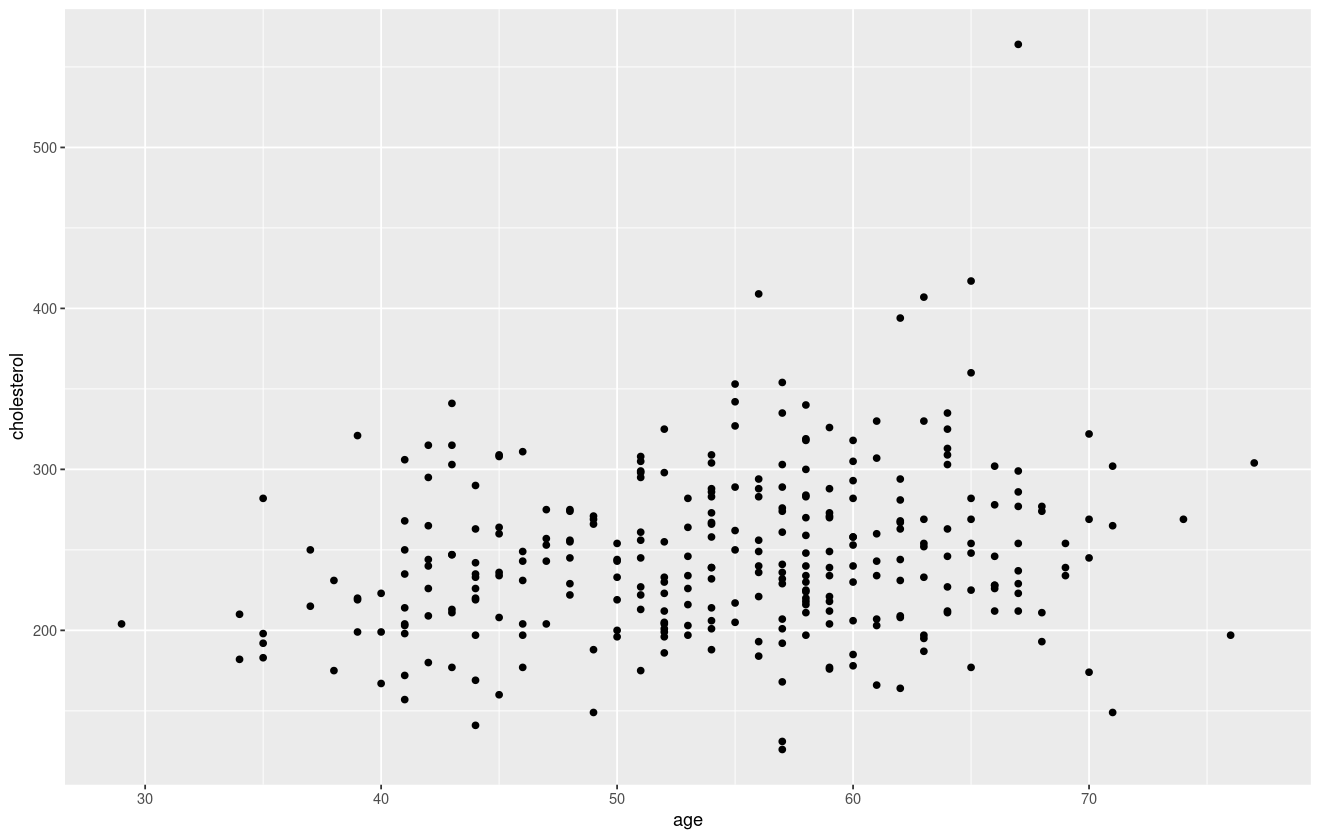

In [57]:
ggplot(data = heart_df, mapping = aes(x = age, y = cholesterol)) +
       geom_point()

All `geom` functions take optional aesthetic values. These include, `color`, `size`, and `alpha` (to control opacity). When these parameters are placed within a `geom` function and outside of the `aes` argument, they are applied to **all points**. You can specify the name of a color in `R` such as "orange" or by supplying a HEX code as I did below.

Below, I am styling the points to have size 2, a blue color using the HEX code #006EA1, and 45% opacity.

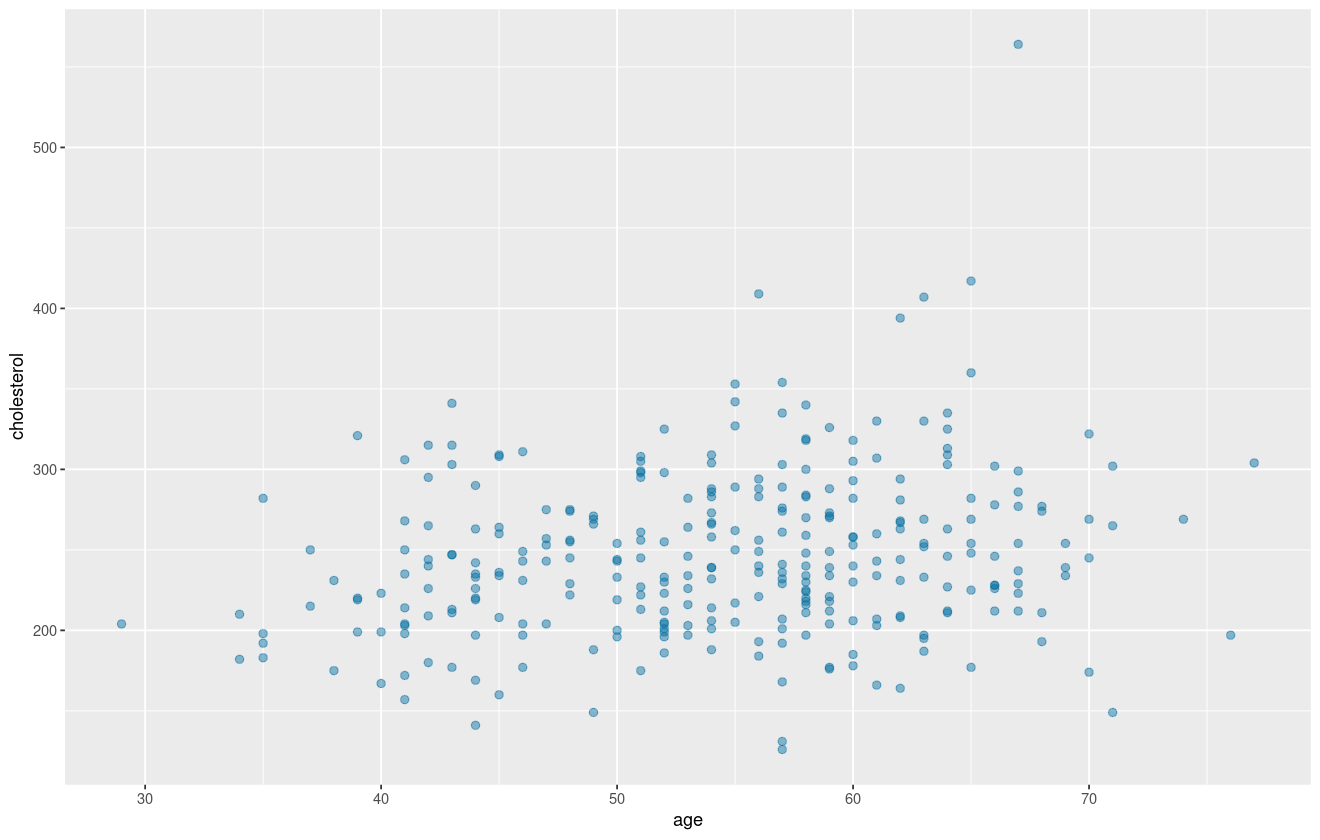

In [58]:
ggplot(data = heart_df, mapping = aes(x = age, y = cholesterol)) +
       geom_point(color = "#006EA1", size = 2, alpha = 0.45)

### Adding a Third Variable With `aes()`

Now we want to visualize the scatter plot by groups, those with heart disease and those without. 

We can color the points by the value of the `heart_disease` variable as follows. Add `color = heart_disease` inside of the `aes` function within the mapping. This adds to the original mapping that we provided to `ggplot()`. 

Now we have mapped each point to three attributes (`age`, `cholesterol`, color based on `heart_disease` value).

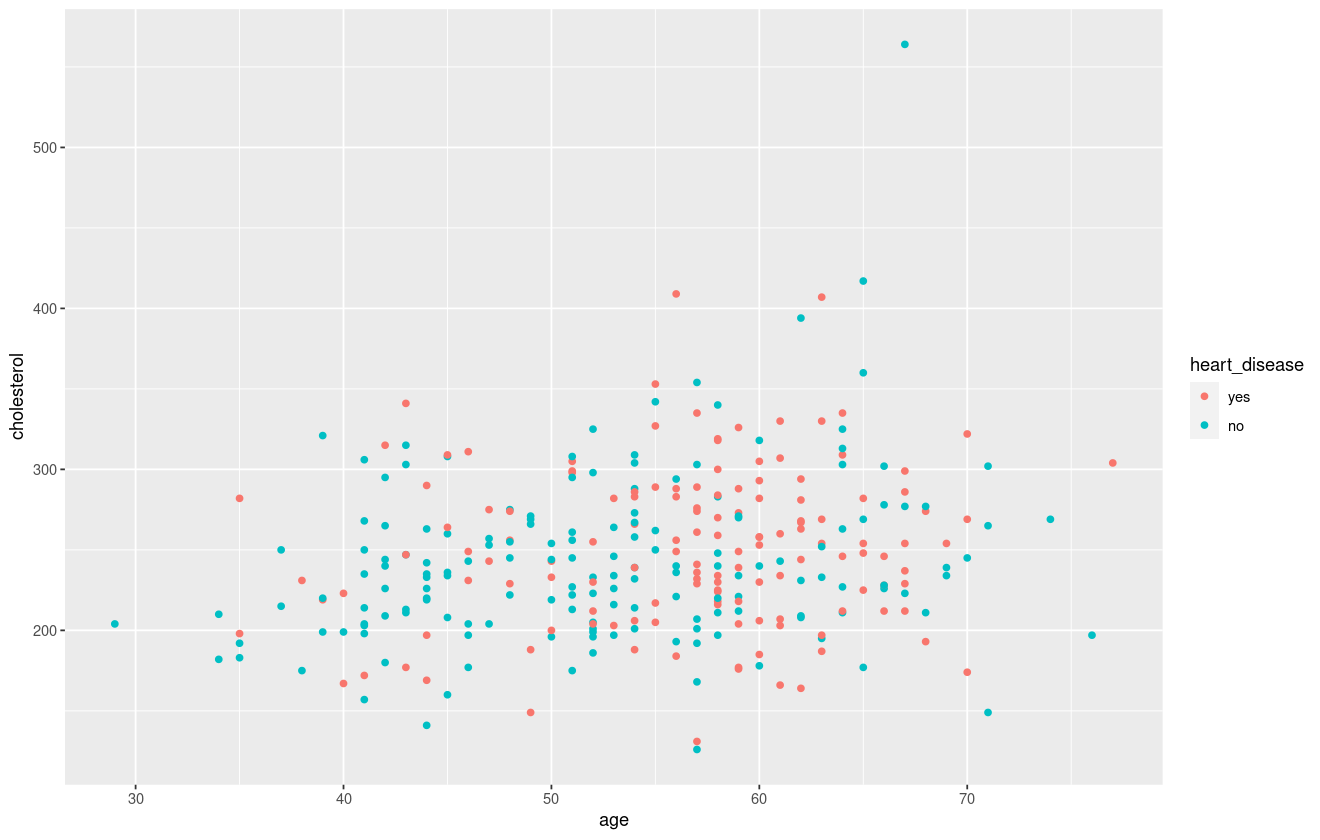

In [59]:
ggplot(data = heart_df, mapping = aes(x = age, y = cholesterol, color = heart_disease)) +
       geom_point()

### Adding a Third Variable by Facet

We can also visualize a third variable by adding the `facet_wrap()` function. 

This function separates the scatter plot based on the value of `heart_disease`.  

The general syntax is

```
facet_wrap( ~ Your_facet_variable, nrow = rows_you_would_like)
```

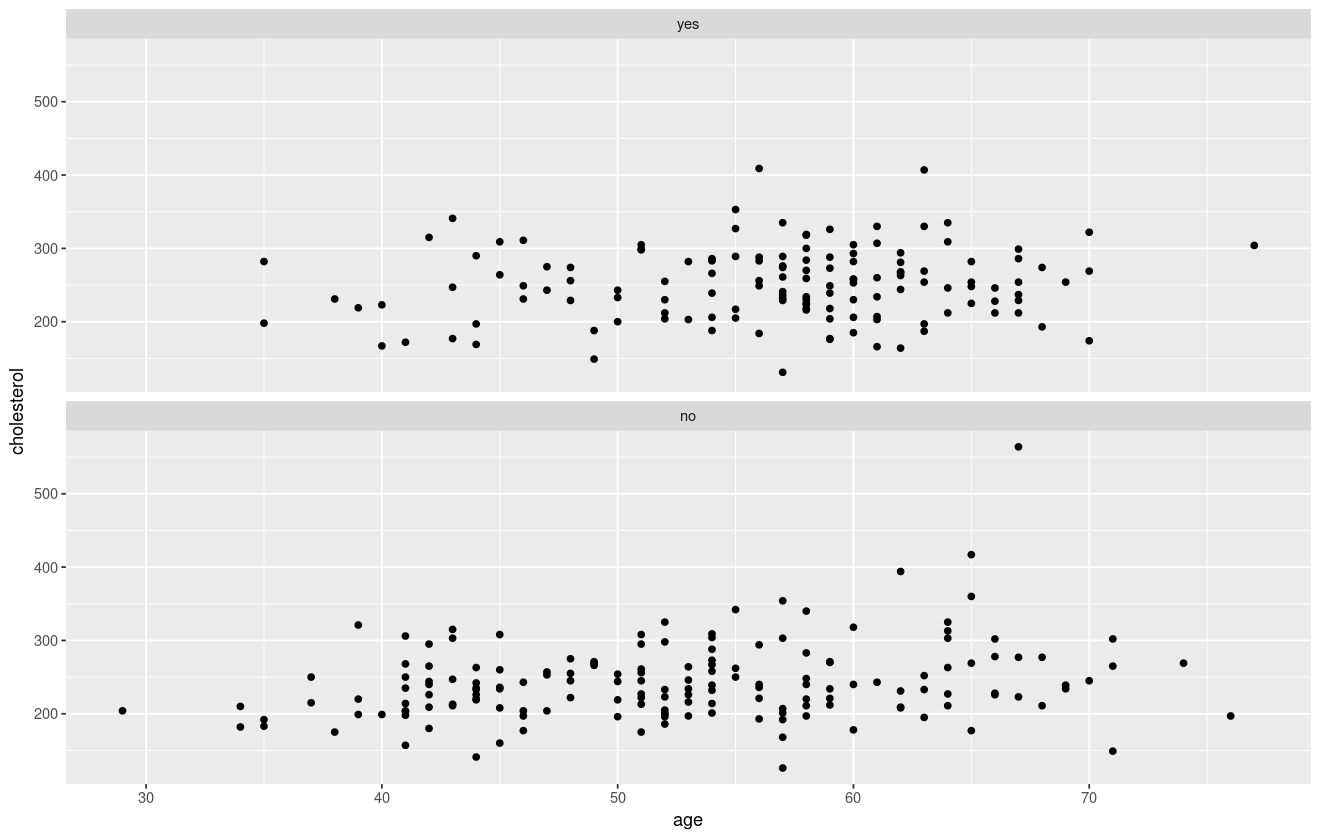

In [60]:
ggplot(data = heart_df, mapping = aes(x = age, y = cholesterol)) +
       geom_point() +
       facet_wrap(~ heart_disease, nrow = 2)

If you would like to keep the `heart_disease` values as different colors, just add `color = heart_disease` into `aes`. 

Below I demonstrate what changing the `nrow` option will do to your plot.

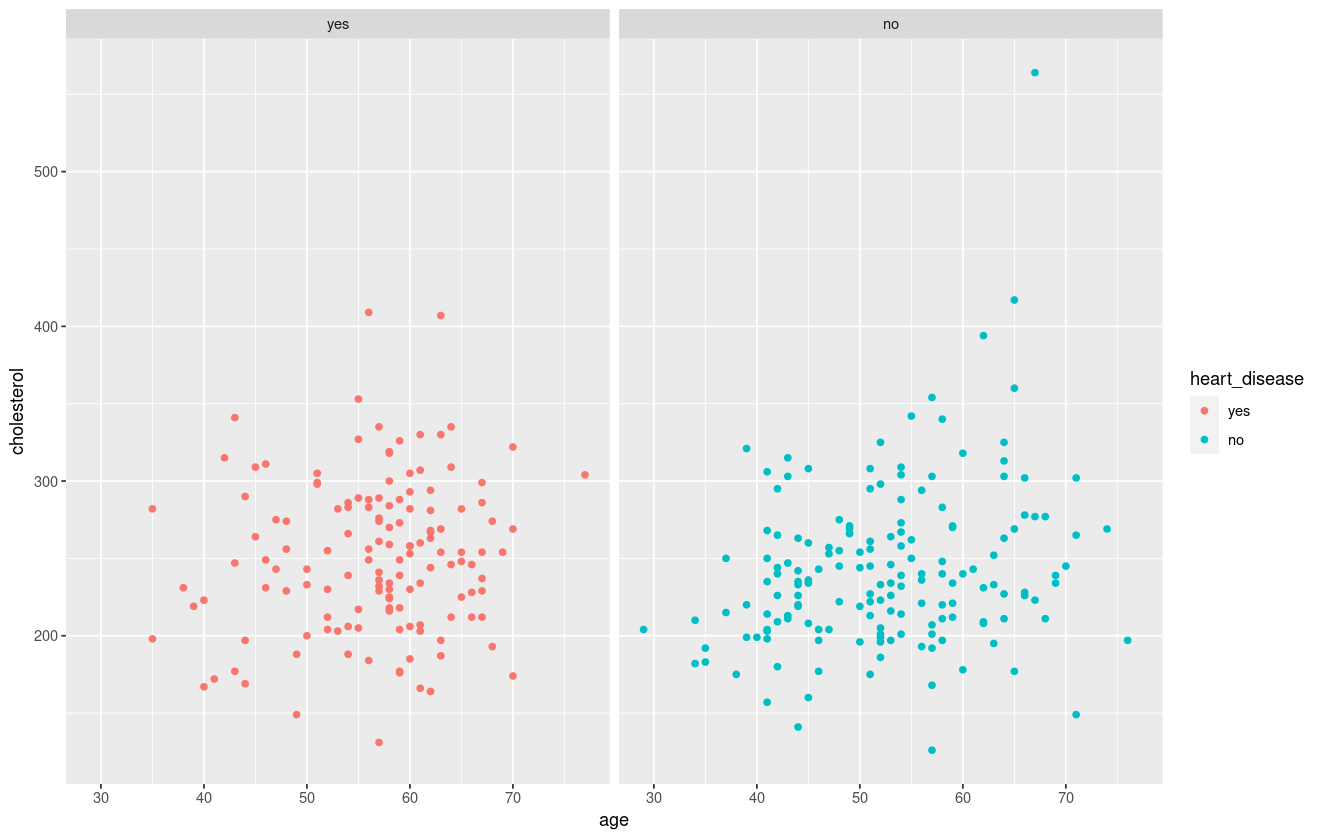

In [61]:
ggplot(data = heart_df, mapping = aes(x = age, y = cholesterol, color = heart_disease)) +
      geom_point() +
      facet_wrap(~ heart_disease, nrow = 1)

### Adding a Fourth Variable by Facet

We can visualize the scatter plot by combinations of character or factor variables. If you are faceting by more than one variable, use the `facet_grid()` function. 

The general syntax for `facet_grid()` is


```
facet_grid(Vertical_variable ~ Horizontal_variable)
```

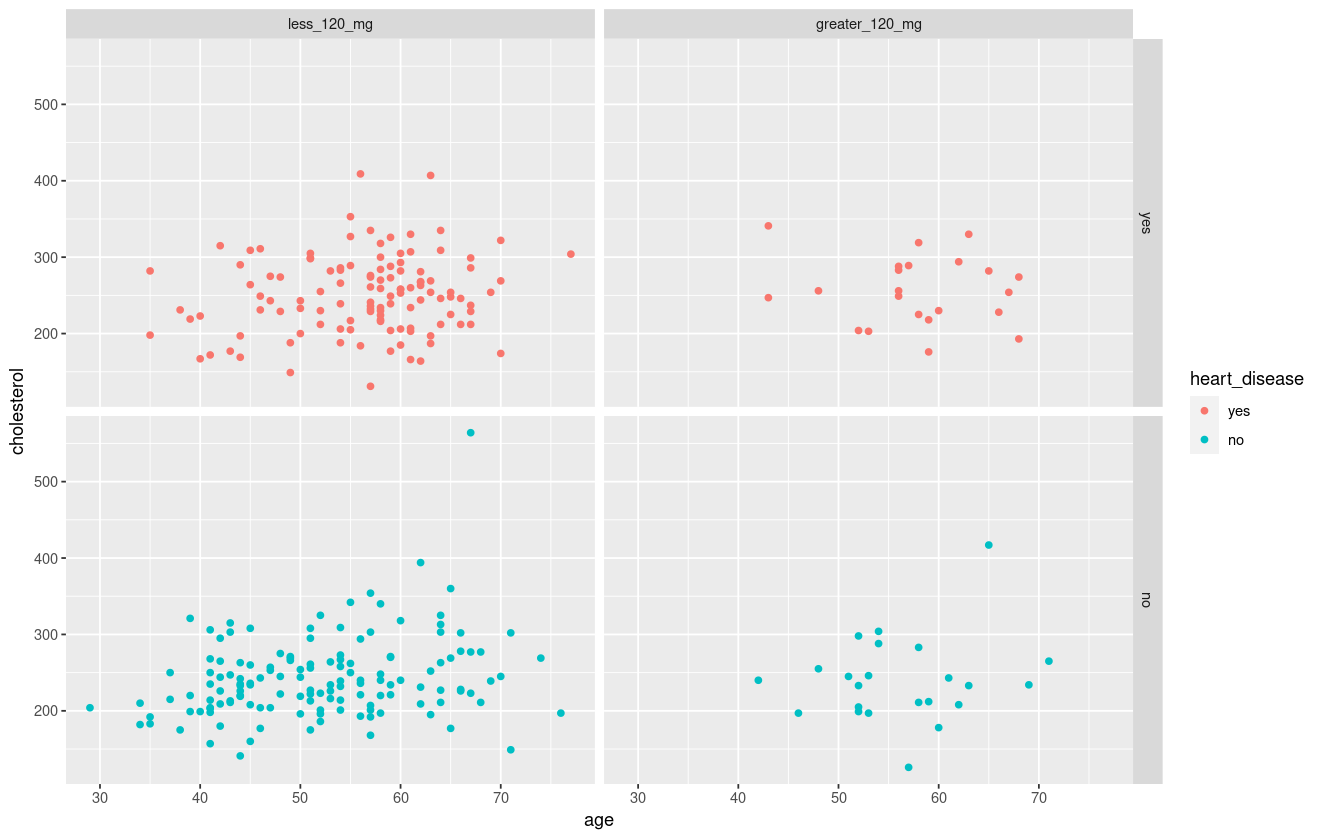

In [62]:
ggplot(data = heart_df, mapping = aes(x = age, y = cholesterol, color = heart_disease)) +
       geom_point() +
       facet_grid(heart_disease ~ fasting_blood_sugar)

<br>

Finally, let's change the title and labels of our plot.

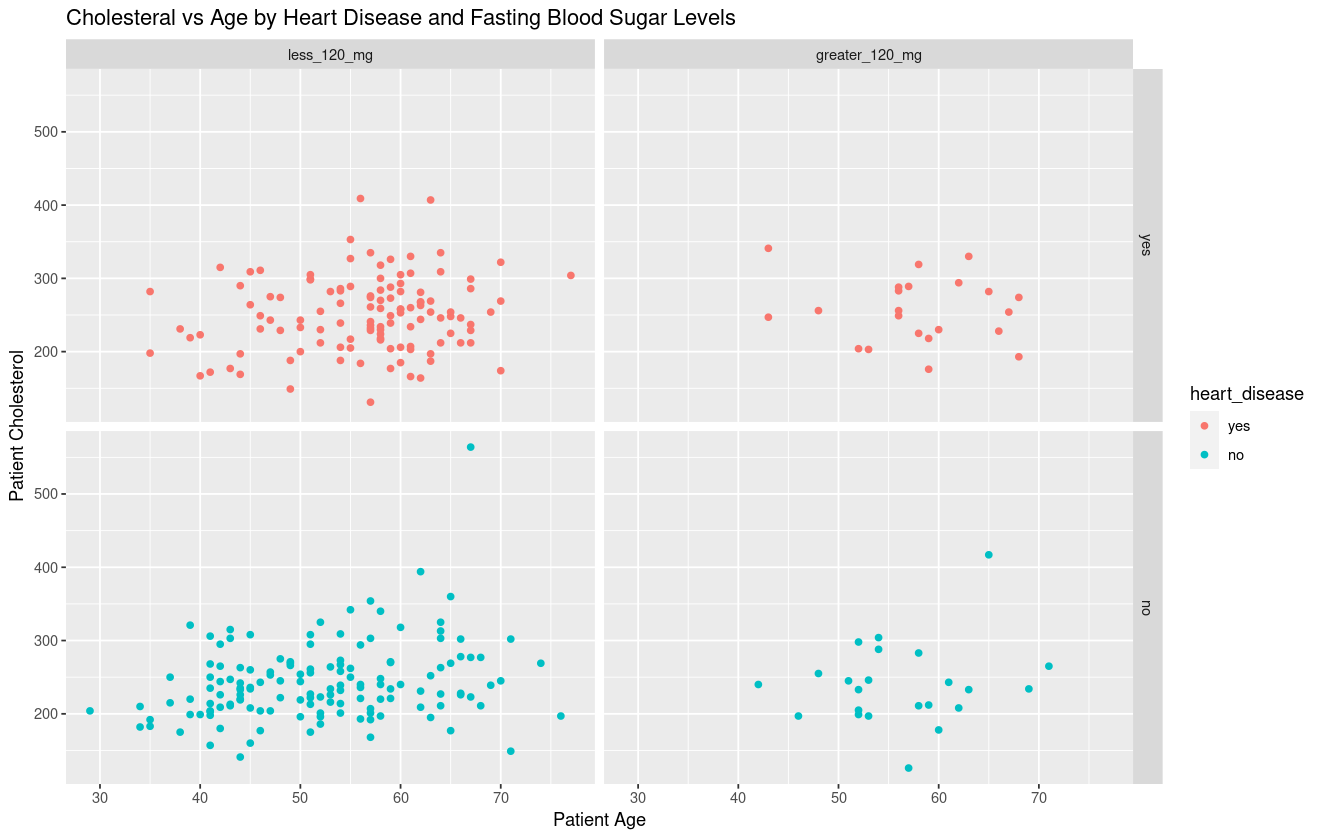

In [63]:
ggplot(data = heart_df, mapping = aes(x = age, y = cholesterol, color = heart_disease)) +
  geom_point() +
  facet_grid(heart_disease ~ fasting_blood_sugar) +
  labs(title = "Cholesteral vs Age by Heart Disease and Fasting Blood Sugar Levels",
       x = "Patient Age",
       y = "Patient Cholesterol")

## Bar Charts

Now that we have gone through the layers of the template, let's see what adjustments are needed to create a bar chart. 

Let's visualize the number of patients with and without heart disease. Now our `aes` mapping in `ggplot()` only has one variable, heart_disease. 

To produce a bar chart, we use the `geom_bar()` function. The `stat = "count"` option tells `ggplot()` to transform the `heart_disease` column values and generate the counts for each level, Yes or No.

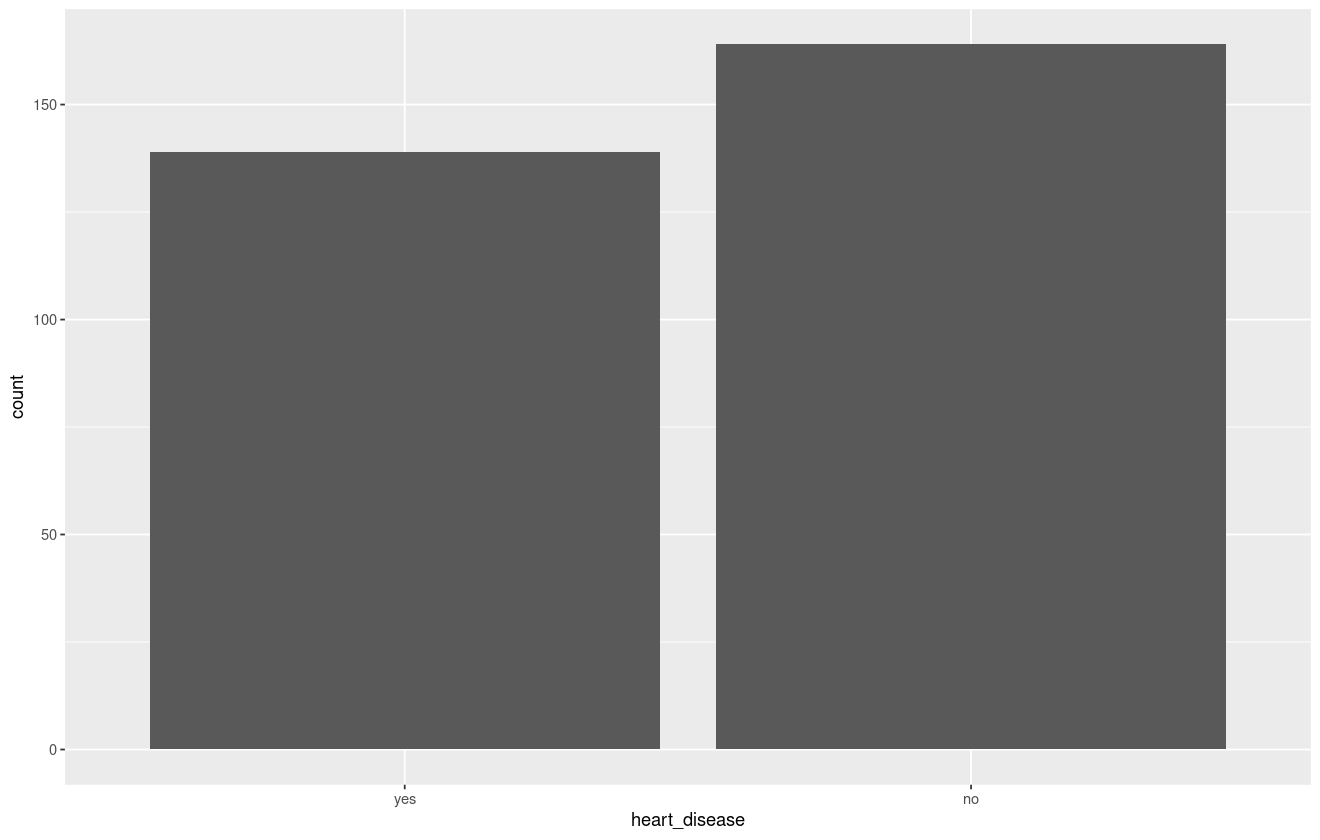

In [64]:
ggplot(data = heart_df, mapping = aes(x = heart_disease)) +
       geom_bar(stat = "count")

<br>

In the graph above, behind the scenes `ggplot()` is computing the following transformation to obtain the counts for each level of `heart_disease`.

In [65]:
heart_df %>% group_by(heart_disease) %>% 
             summarise(count = n())

heart_disease,count
<fct>,<int>
yes,139
no,164


<br>

If you wanted to compute the summary statistics yourself, you could do the following. 

Using `dplyr`, create a summary data frame, `heart_summary`, that has two variables, `heart_disease` and `count`. The `count` variable will have the number of patients that belong to the corresponding value of `heart_disease`.

Next, you must add `y = count` into the `aes` option in `ggplot()`. This tells `ggplot()` that you want to plot two pairs of coordinates (heart_disease value, count for heart_disease value). In this example, (No, 160), and (Yes, 137).

Finally, you must change `stat = "count"` in `geom_bar()` to `stat = "identity"`

In [66]:
heart_summary <-  heart_df %>% 
                  group_by(heart_disease) %>% 
                  summarise(count = n())

In [67]:
#View results
heart_summary

heart_disease,count
<fct>,<int>
yes,139
no,164


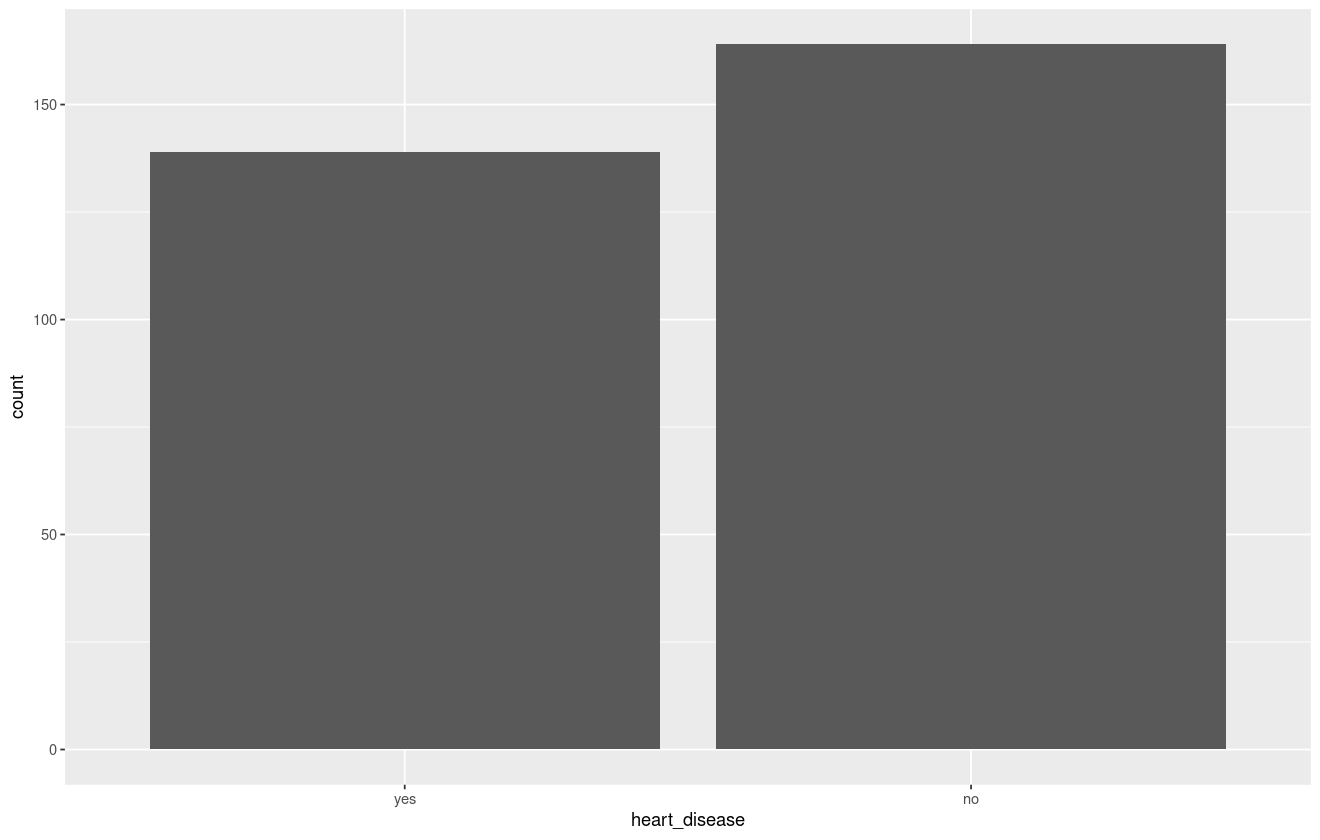

In [68]:
# Plot the data, same as before
ggplot(data = heart_summary, mapping = aes(x = heart_disease, y = count)) +
       geom_bar(stat = "identity")

<br>

Let's use this same methodology to plot a bar chart of average `old_peak`, by `chest_pain`. This time, let's make the bars blue with a white border and add text labels. To change the bar color for all bars, use the `fill` option within `geom_bar()`. To change the border color, use `color`.


In [69]:
oldpeak_summary <- heart_df %>% group_by(chest_pain) %>% 
                   summarise(avg_oldpeak = mean(old_peak))

In [70]:
# View results
oldpeak_summary

chest_pain,avg_oldpeak
<fct>,<dbl>
typical,1.3913043
atypical,0.3160000
non_anginal,0.8069767
asymptomatic,1.3736111


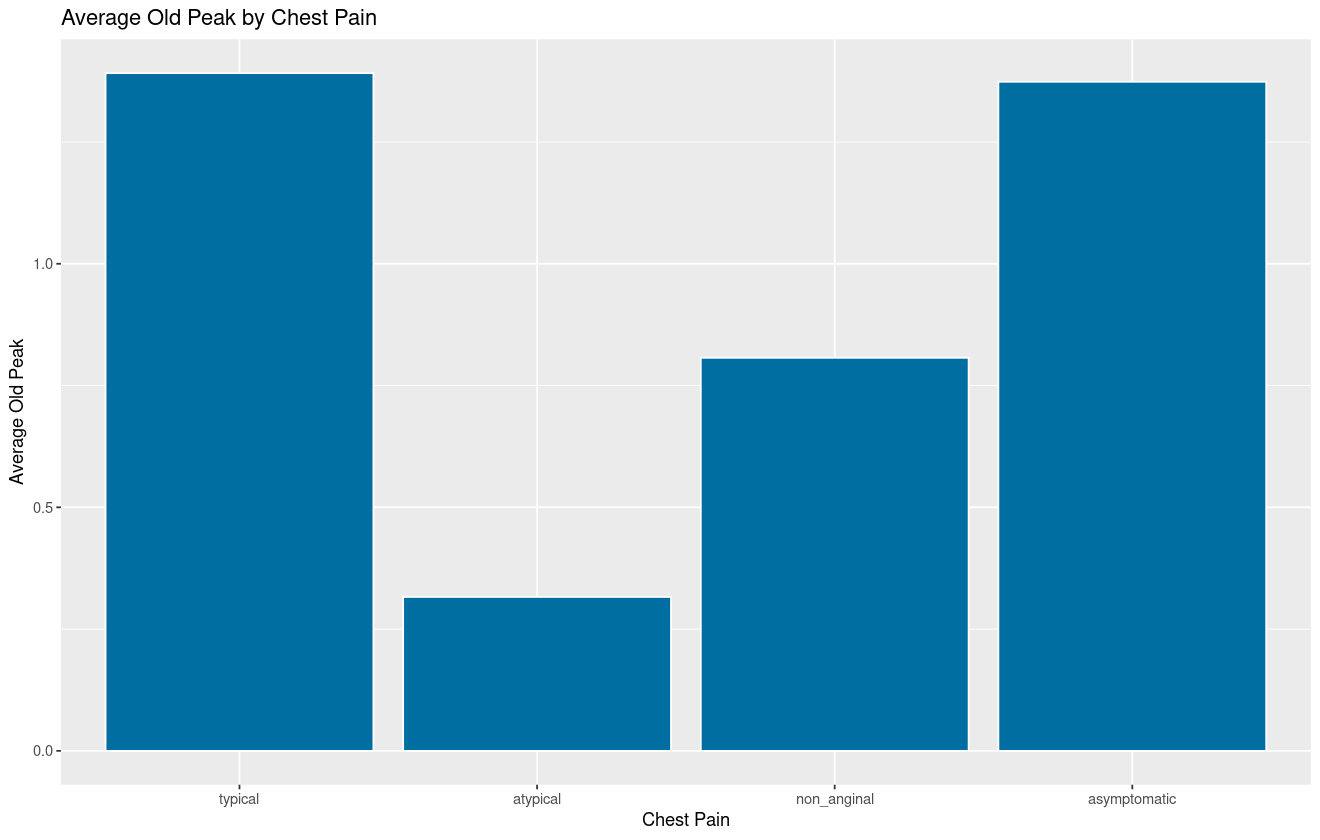

In [71]:
# Plot the data
ggplot(data = oldpeak_summary, mapping = aes(x = chest_pain, y = avg_oldpeak)) +
      geom_bar(stat = "identity", fill = "#006EA1", color = "white") +
      labs(title = "Average Old Peak by Chest Pain",
           x = "Chest Pain",
           y = "Average Old Peak")

### Reorder The Categories of a Bar Chart with *reorder()*

To reorder the categorical values of either the x or y axis on a bar chart, we can use the `reorder()` function from base `R`. 

The `reorder()` function has two required arguments - a vector of values in the first argument and another vector of values of equal length as the second argument by which to sort the first. Let's see some examples below.

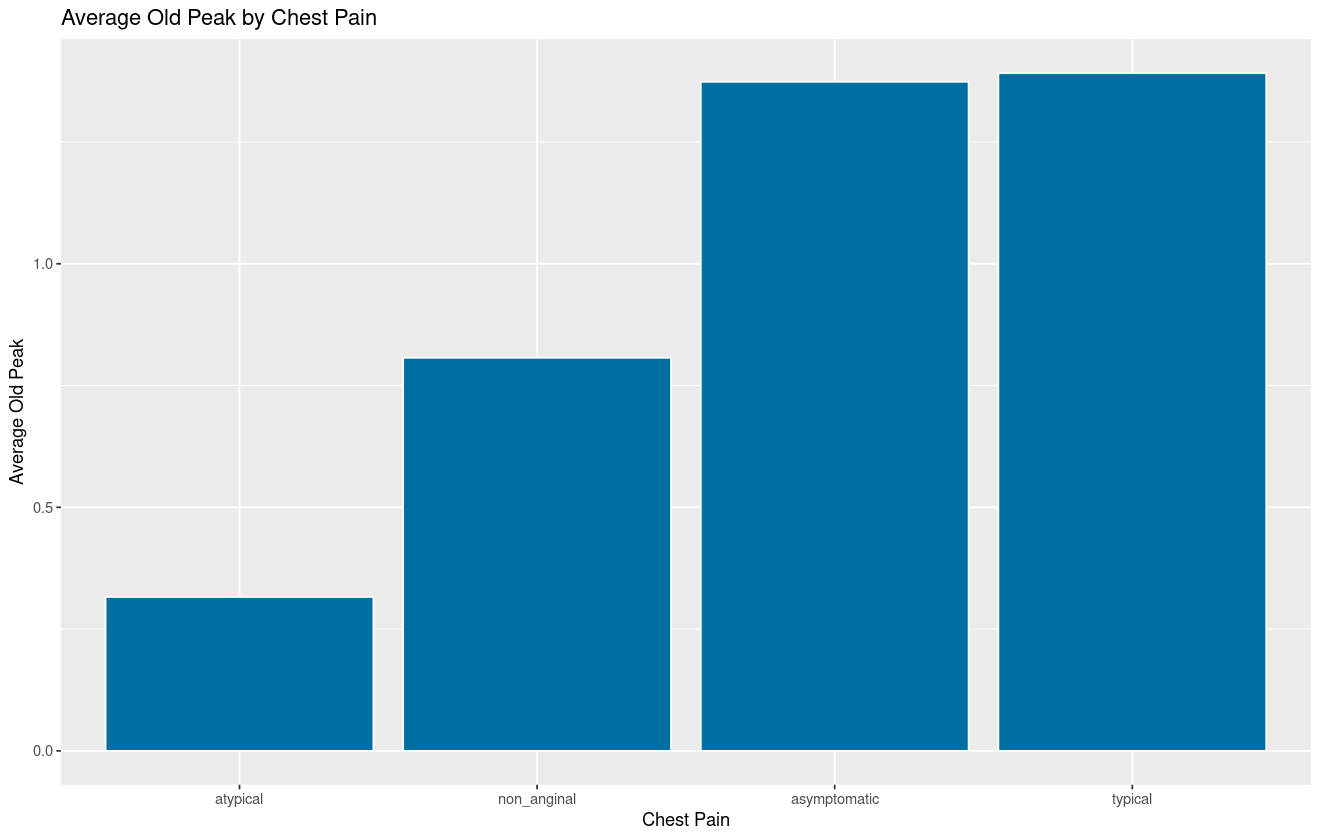

In [72]:
 ggplot(data = oldpeak_summary, mapping = aes(x = reorder(chest_pain, avg_oldpeak), 
                                              y = avg_oldpeak)) +
        geom_bar(stat = "identity", fill = "#006EA1", color = "white") +
        labs(title = "Average Old Peak by Chest Pain",
             x = "Chest Pain",
             y = "Average Old Peak")

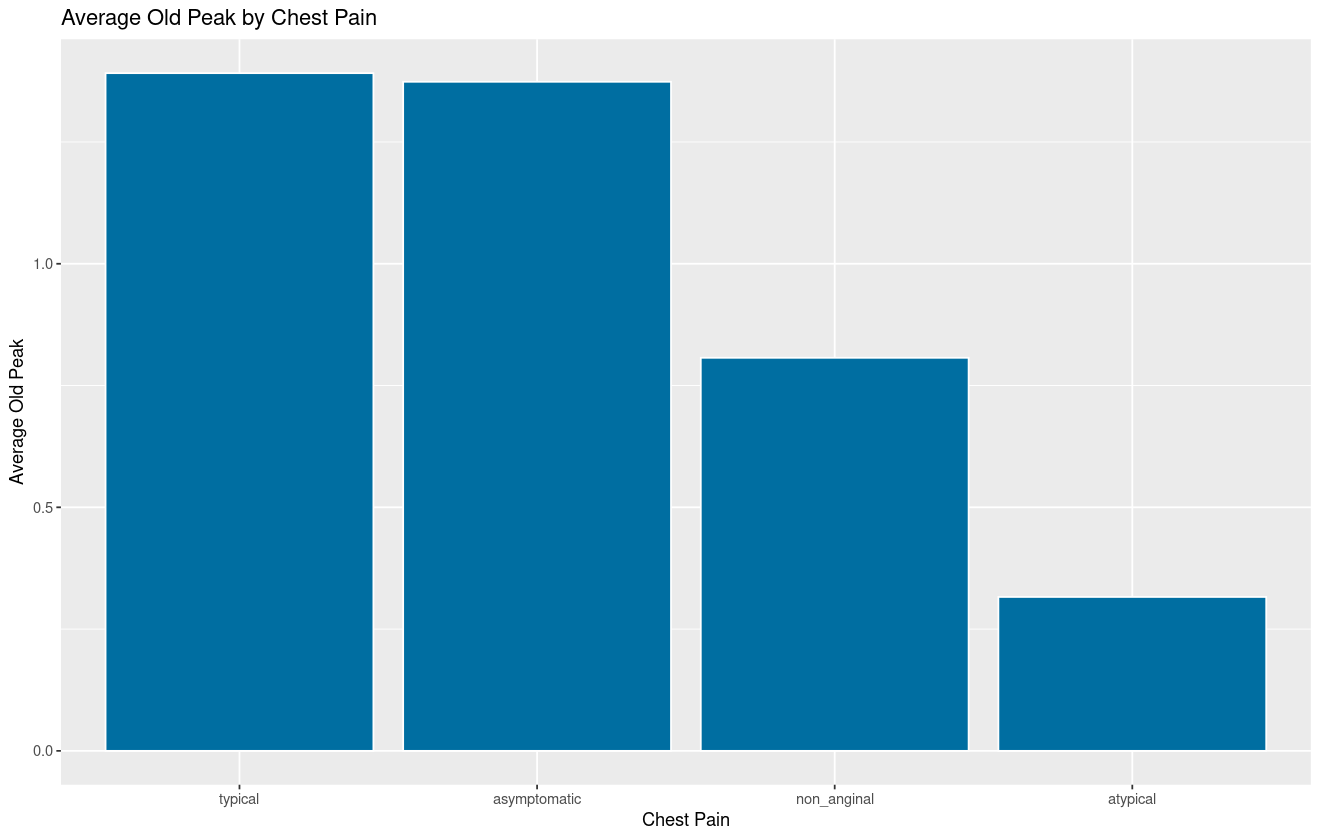

In [73]:
# To sort values in reverse order, simply put a minus (-) in 
# front of the second variable
ggplot(data = oldpeak_summary, mapping = aes(x = reorder(chest_pain, -avg_oldpeak), 
                                              y = avg_oldpeak)) +
        geom_bar(stat = "identity", fill = "#006EA1", color = "white") +
        labs(title = "Average Old Peak by Chest Pain",
             x = "Chest Pain",
             y = "Average Old Peak")

Let's go back to our original bar chart that showed the number of patients with and without heart disease. If we wanted to color the bars by `heart_disease` value, we can perform the same step as with the scatter plot. Now we add `fill = heart_disease` into the `aes` mapping. 

When you add the `fill` option into `aes` it updates the aesthetic mapping to include three dimensions for each bar (`heart_disease` value, count, fill color of `heart_disease` value). 


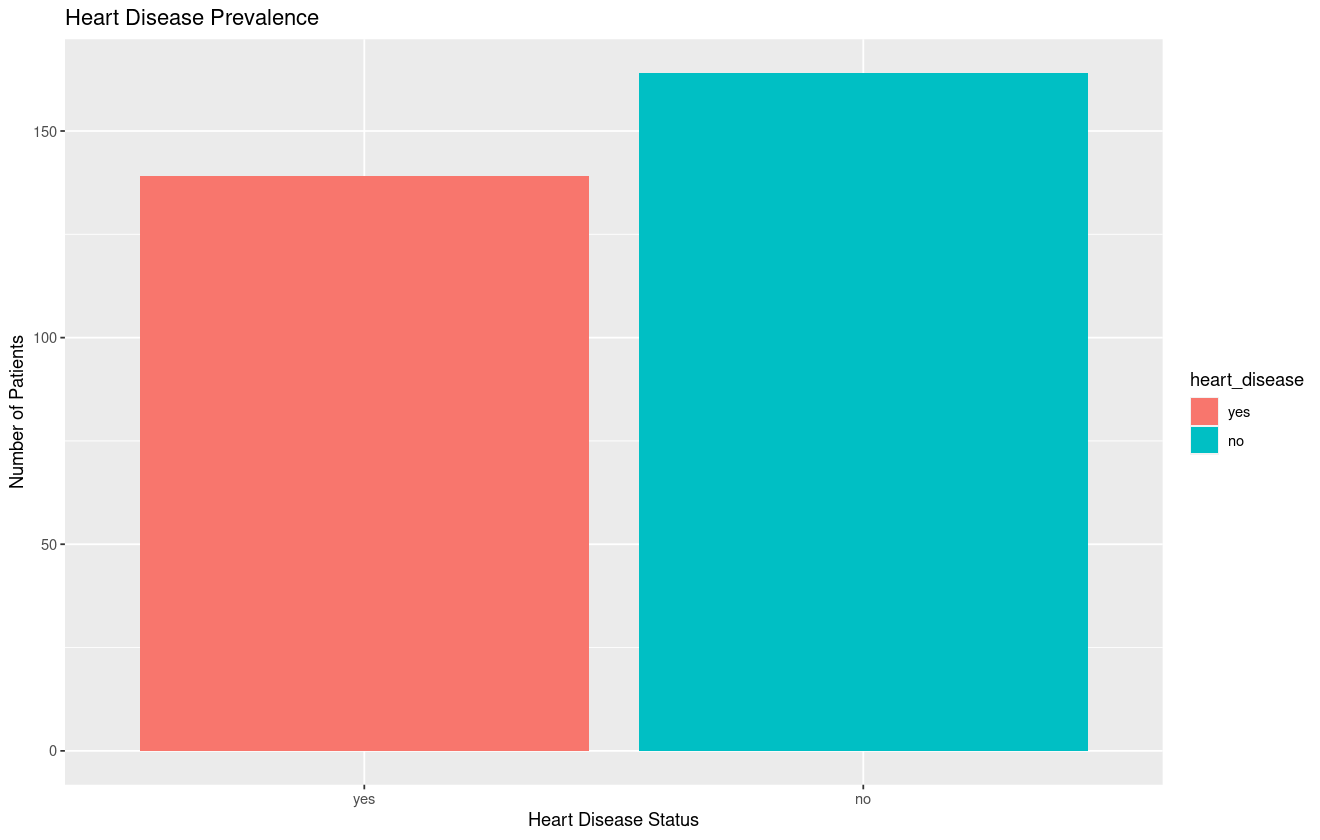

In [74]:
ggplot(data = heart_df, mapping = aes(x = heart_disease, fill = heart_disease)) +
       geom_bar(stat = "count") + 
       labs(title = "Heart Disease Prevalence", x = "Heart Disease Status",
            y = "Number of Patients")

### Adding a Facet Variable

We can add a facet variable in the same way as we did with the scatter plot example, by adding `facet_wrap()`

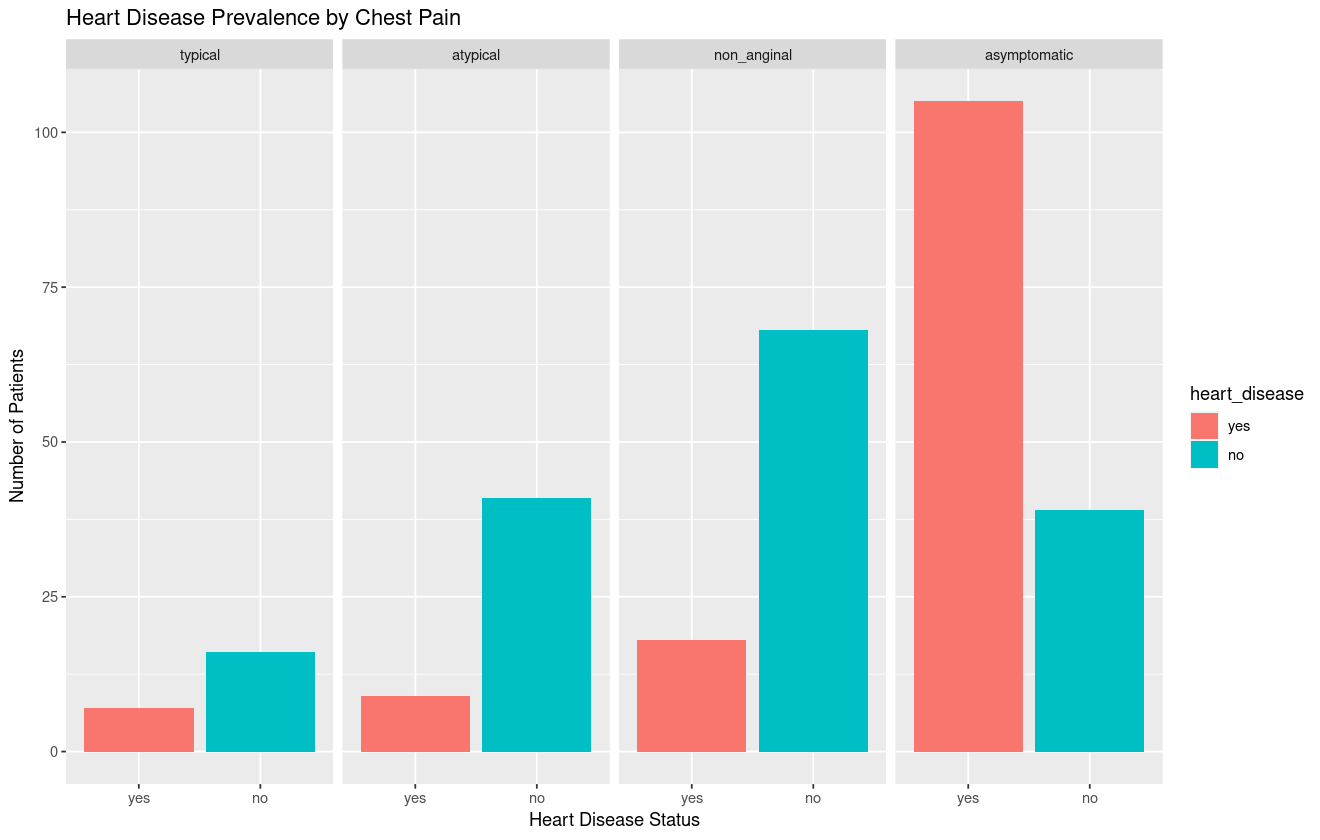

In [75]:
ggplot(data = heart_df, mapping = aes(x = heart_disease, fill = heart_disease)) +
       geom_bar(stat = "count") + 
       facet_wrap(~ chest_pain, nrow = 1) +
       labs(title = "Heart Disease Prevalence by Chest Pain", x = "Heart Disease Status",
            y = "Number of Patients")

## Stacked Bar Charts

If we add a variable to `aes(fill = )` that is different from the variable mapped to the x-axis, then we create a stacked bar chart. 

The variable which we add to the `fill` option in `aes`, will add a color based on the level of that variable and will display its width by the number of observations in the data. 

Below we create a stacked bar chart by adding the `chest_pain` variable.

<br>


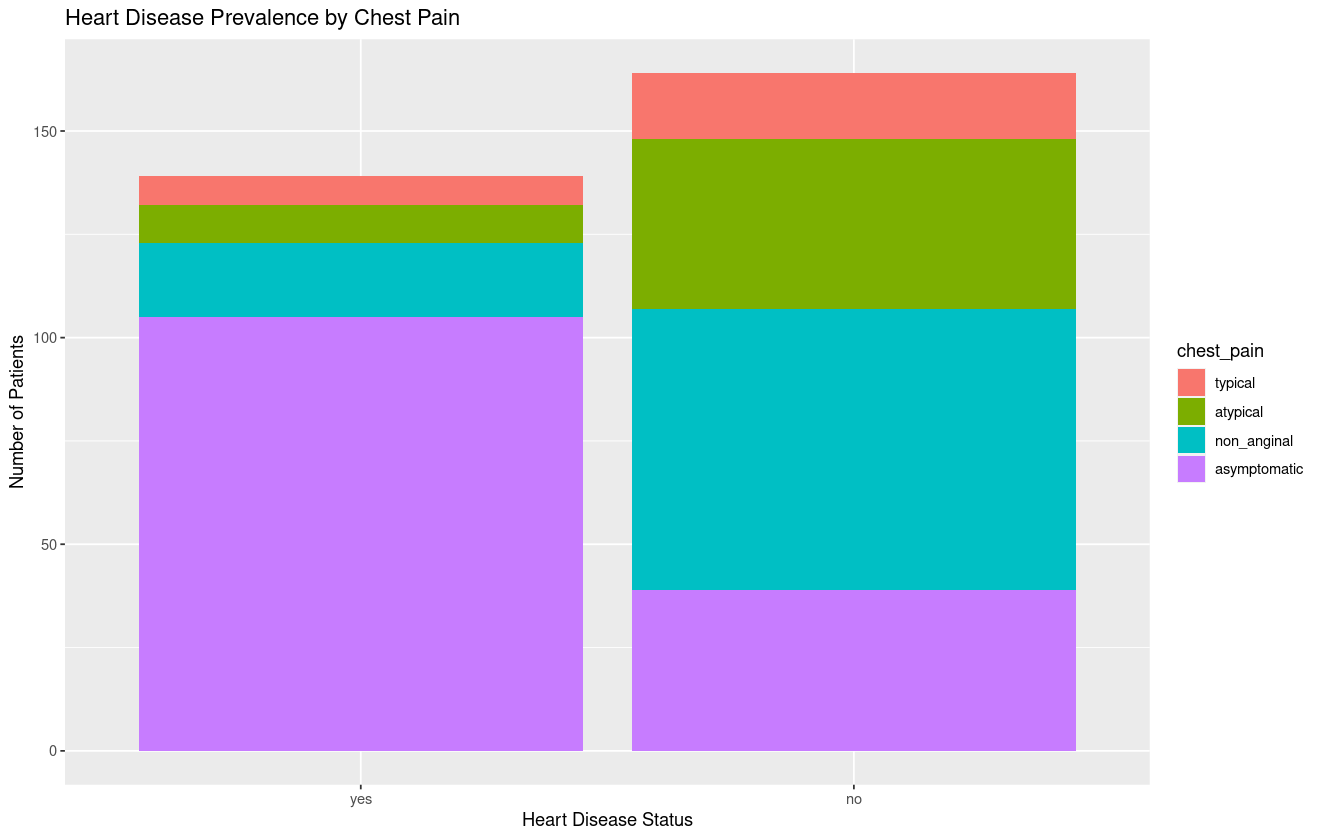

In [76]:
ggplot(data = heart_df, mapping = aes(x = heart_disease, fill = chest_pain)) +
       geom_bar(stat = "count") + 
       labs(title = "Heart Disease Prevalence by Chest Pain",
            x = "Heart Disease Status",
            y = "Number of Patients")

<br>

We can also create a 100 percent stacked column chart by adding `position = "fill"` into `geom_bar()`. This will display the proportion of observations that fall into the various values of `chest_pain` within each `heart_disease` value.

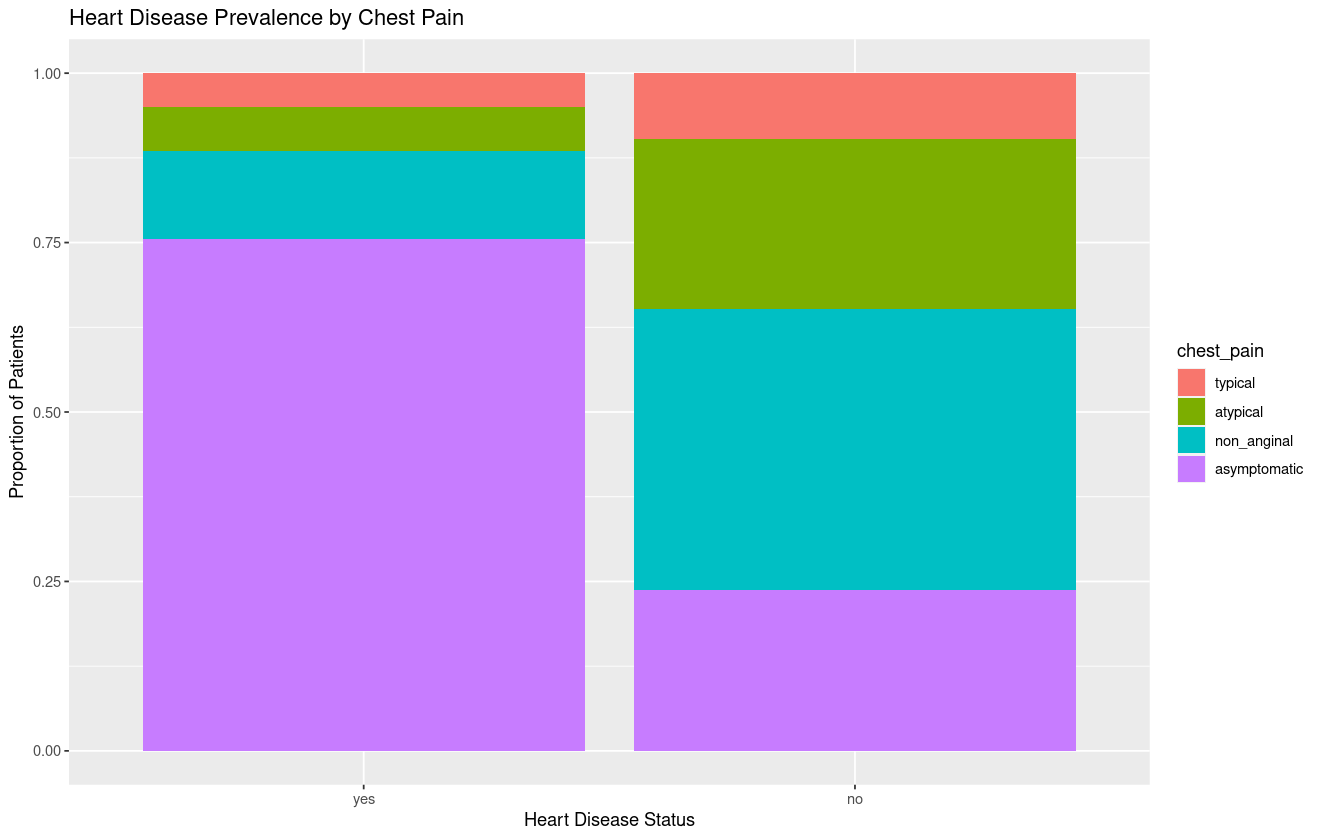

In [77]:
ggplot(data = heart_df, mapping = aes(x = heart_disease, fill = chest_pain)) +
       geom_bar(stat = "count", position = "fill") + 
       labs(title = "Heart Disease Prevalence by Chest Pain",
            x = "Heart Disease Status",
            y = "Proportion of Patients")

### Stacking Bars Side by Side

A third option for working with stacked bar plots is to add `position = "dodge"` within `geom_bar()` to stack bars side by side.

These type of plots are usually used to compare multiple values or proportions that are changing over time. 

Let's apply this style to our visualization of `heart_disease` and `chest_pain`.

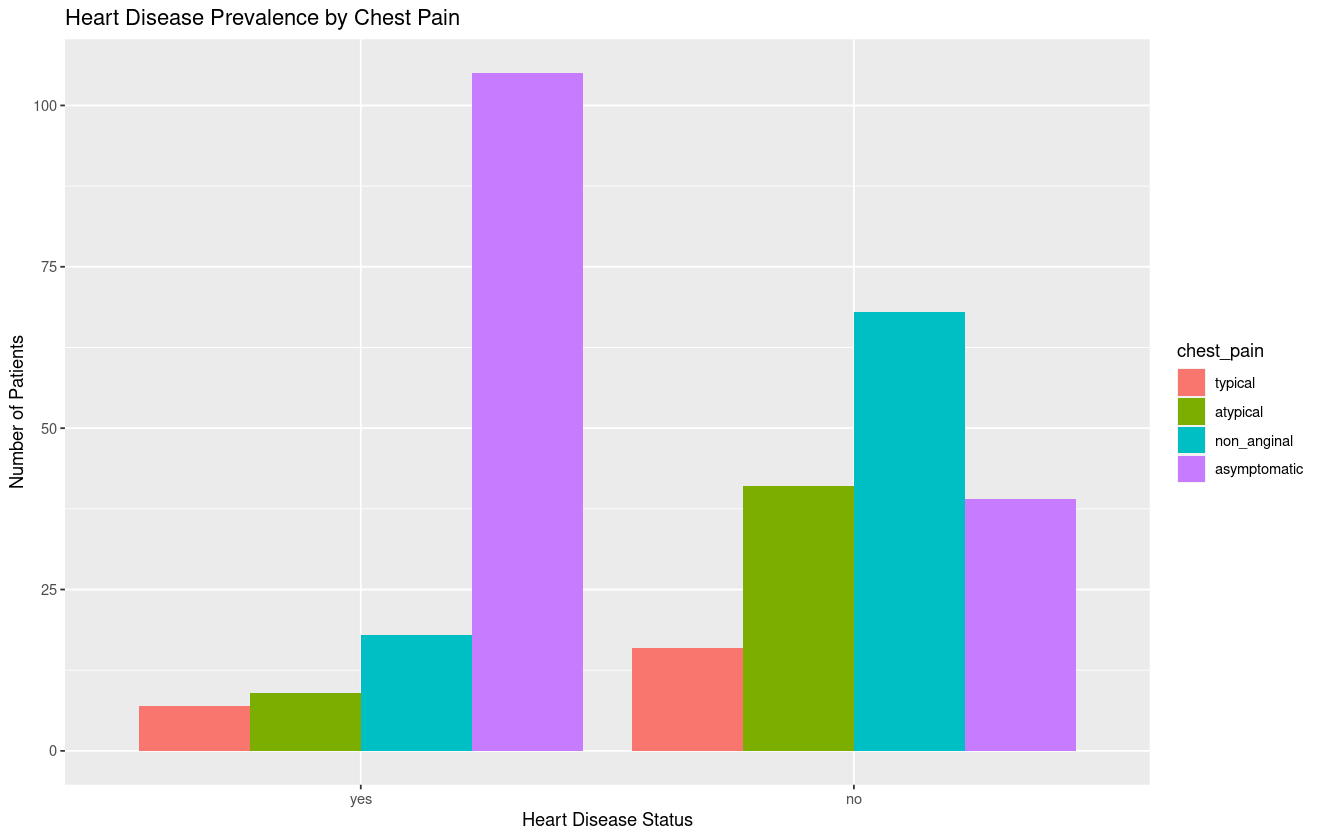

In [78]:
ggplot(data = heart_df, mapping = aes(x = heart_disease, fill = chest_pain)) +
       geom_bar(stat = "count", position = "dodge") + 
       labs(title = "Heart Disease Prevalence by Chest Pain",
            x = "Heart Disease Status",
            y = "Number of Patients")


## Column Charts

To obtain a column chart, we can first build a bar chart and then use the `coord_flip()` function to flip the x and y axes. In the example below, we first build a bar chart and then take the necessary steps to build a column chart.
<br>

### Build a Bar Chart


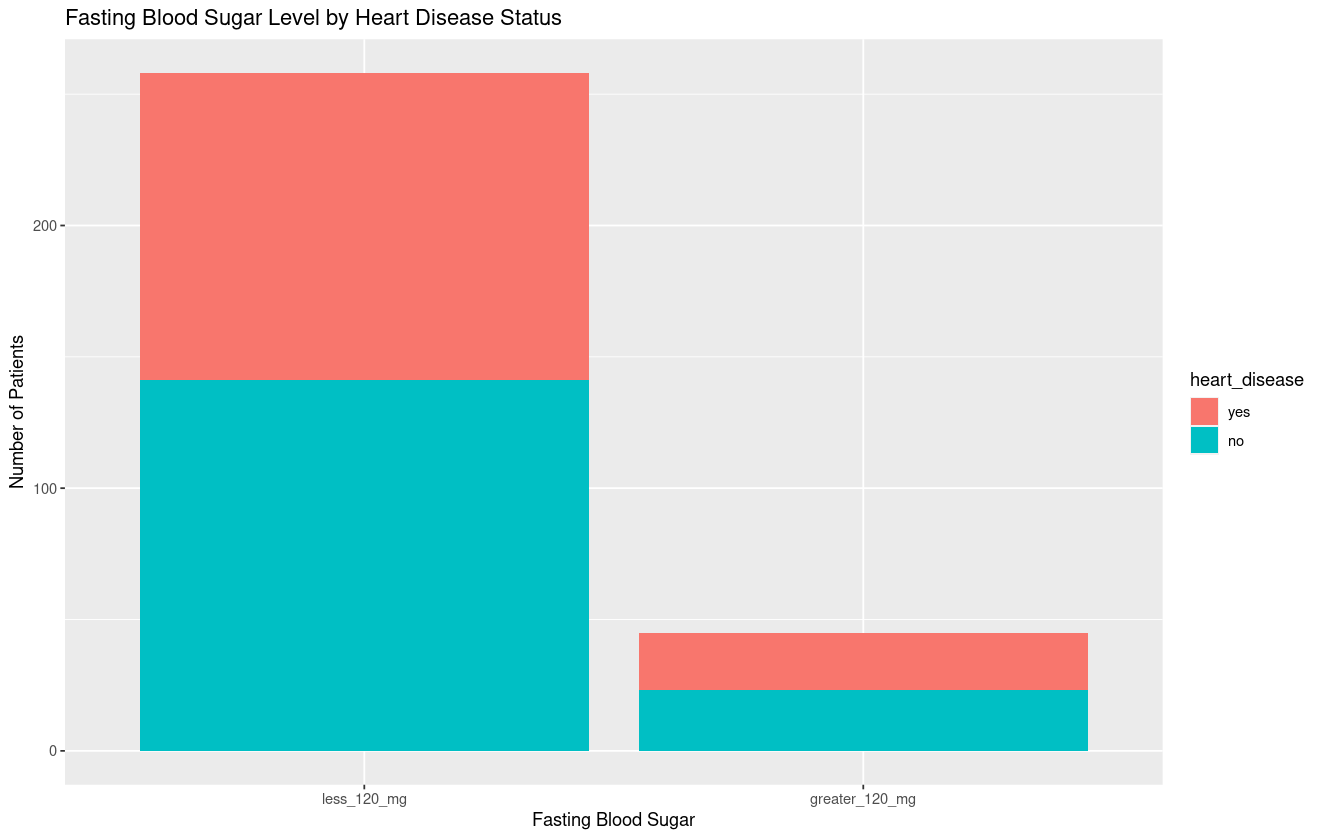

In [79]:
ggplot(data = heart_df, aes(x = fasting_blood_sugar, fill = heart_disease)) +
    geom_bar(stat = "count") +
    labs(title = "Fasting Blood Sugar Level by Heart Disease Status",
         x = "Fasting Blood Sugar", y = "Number of Patients")

<br>

### Flip The Axes With `coord_flip()`


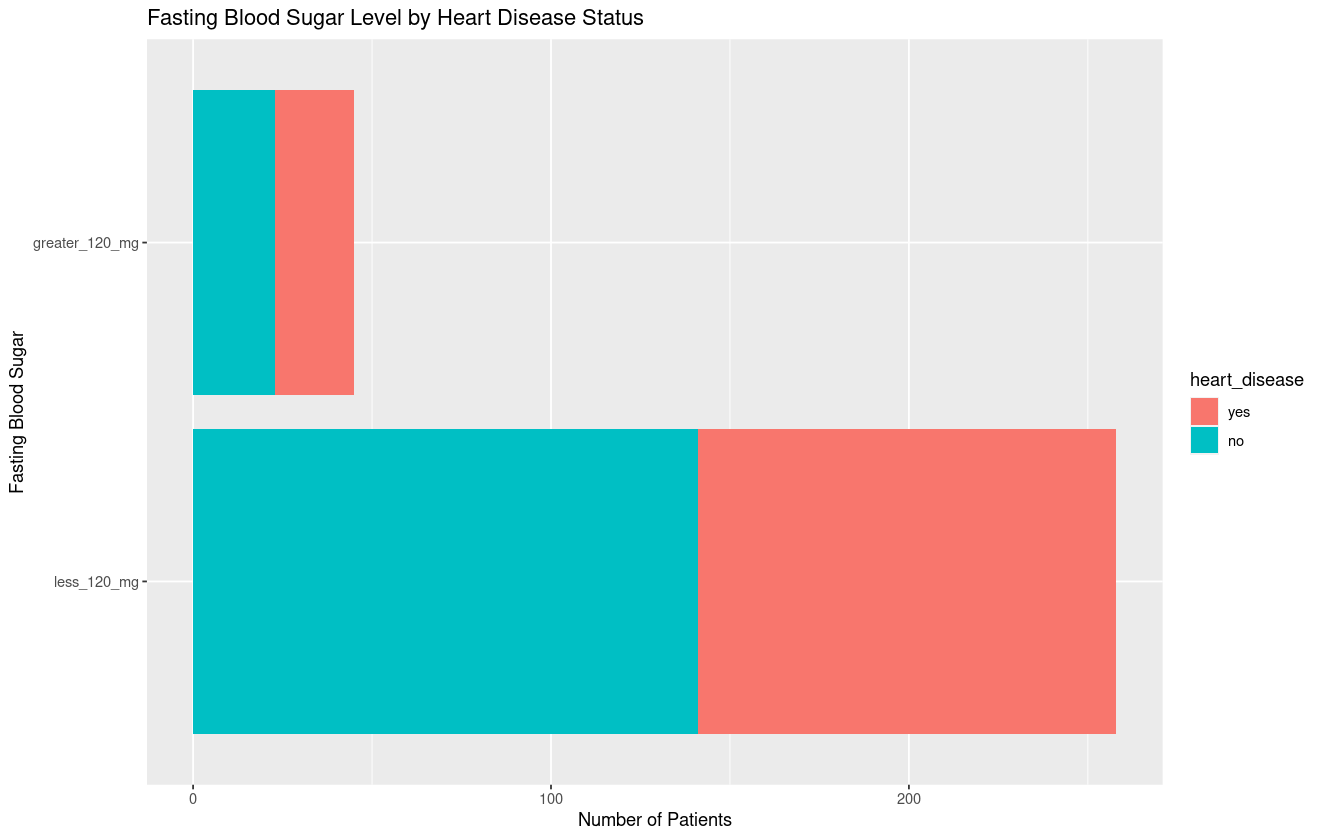

In [81]:
ggplot(data = heart_df, aes(x = fasting_blood_sugar, fill = heart_disease)) +
    geom_bar(stat = "count") +
    labs(title = "Fasting Blood Sugar Level by Heart Disease Status",
         x = "Fasting Blood Sugar", y = "Number of Patients") +
    coord_flip()

## Histograms

Histograms are used to visualize the distribution of continuous variables. They automatically create a series of `bins` that combine the values of a numeric variable into categories. Then the number of times the original values fall into these bins is counted and displayed as a vertical bar. These graphs are used to visually assess the properties of numeric variables, such as symmetry, skewness, variability, and central tendency.

To create a histogram, use the `geom_histogram()` function. In the example below I have added `fill = "#006EA1"` and `color = "white"` inside the `geom_histogram()` function. The `fill` option specifies the bar color, while the `color` option specifies the border color of the bars, just as in bar charts.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


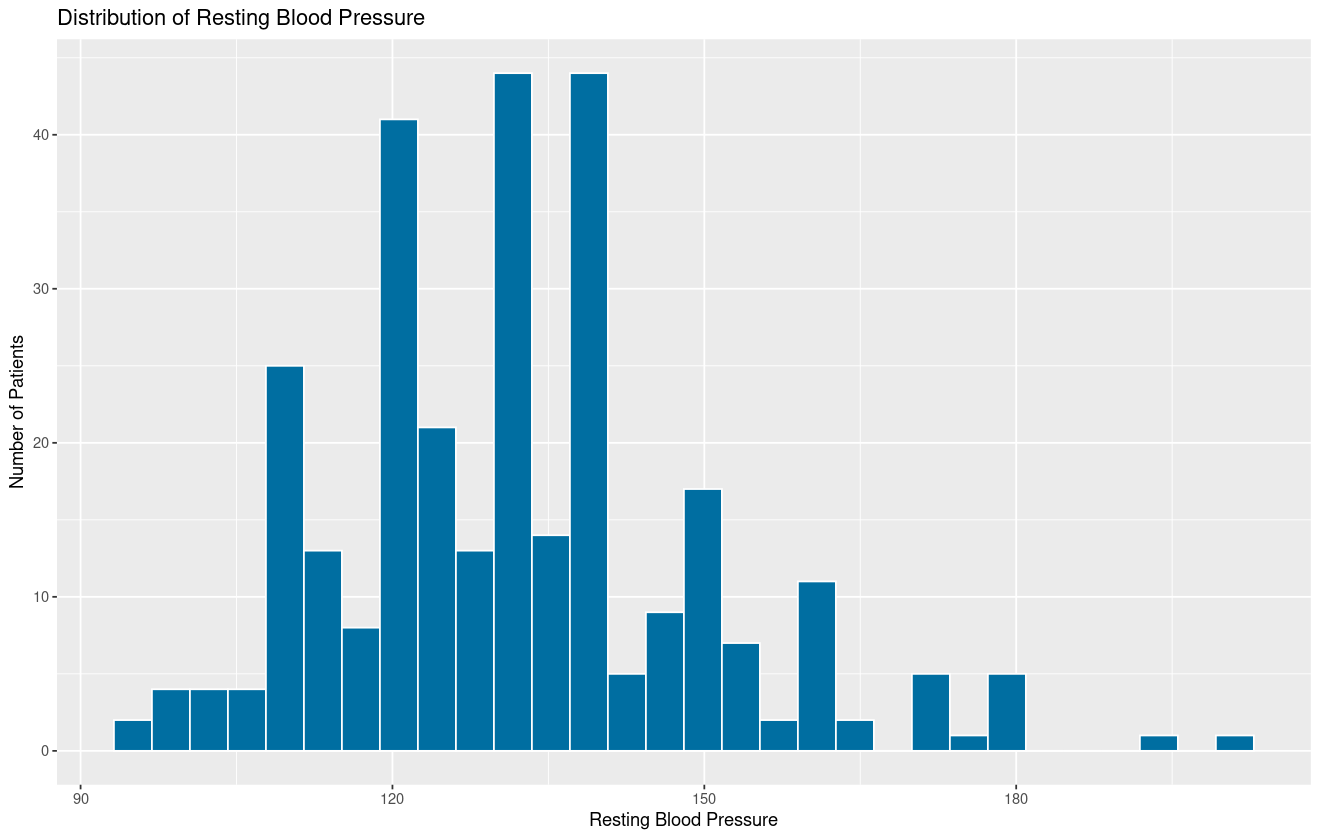

In [82]:
ggplot(data = heart_df, mapping = aes(x = resting_blood_pressure)) +
       geom_histogram(fill = "#006EA1", color = "white") + 
       labs(title = "Distribution of Resting Blood Pressure",
            x = "Resting Blood Pressure",
            y = "Number of Patients")

<br>

The default number of bins for histograms is set to 30. To change this, adjust the `bins` option within the `geom_histogram()` function. In the example below, the histogram is created using 15 bins for the `RestBP` variable.

<br>


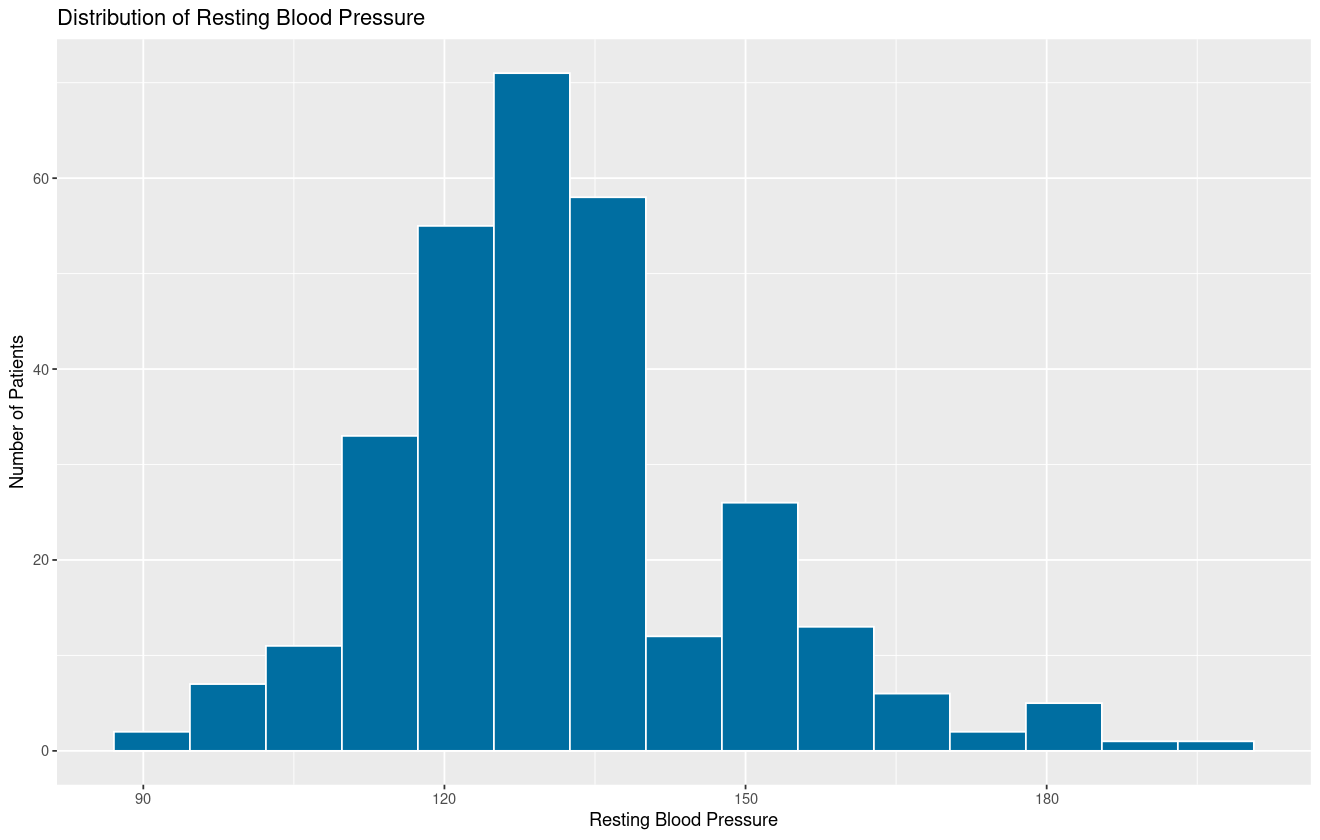

In [83]:
ggplot(data = heart_df, mapping = aes(x = resting_blood_pressure)) +
      geom_histogram(fill = "#006EA1", color = "white", bins = 15) + 
      labs(title = "Distribution of Resting Blood Pressure",
           x = "Resting Blood Pressure",
           y = "Number of Patients")

### Adding Additional Variables to Histograms

Let's look at the distribution of `resting_blood_pressure` by the `heart_disease` variable. We can do this by faceting. I demonstrate how to do this with one and two facet variables in the code below

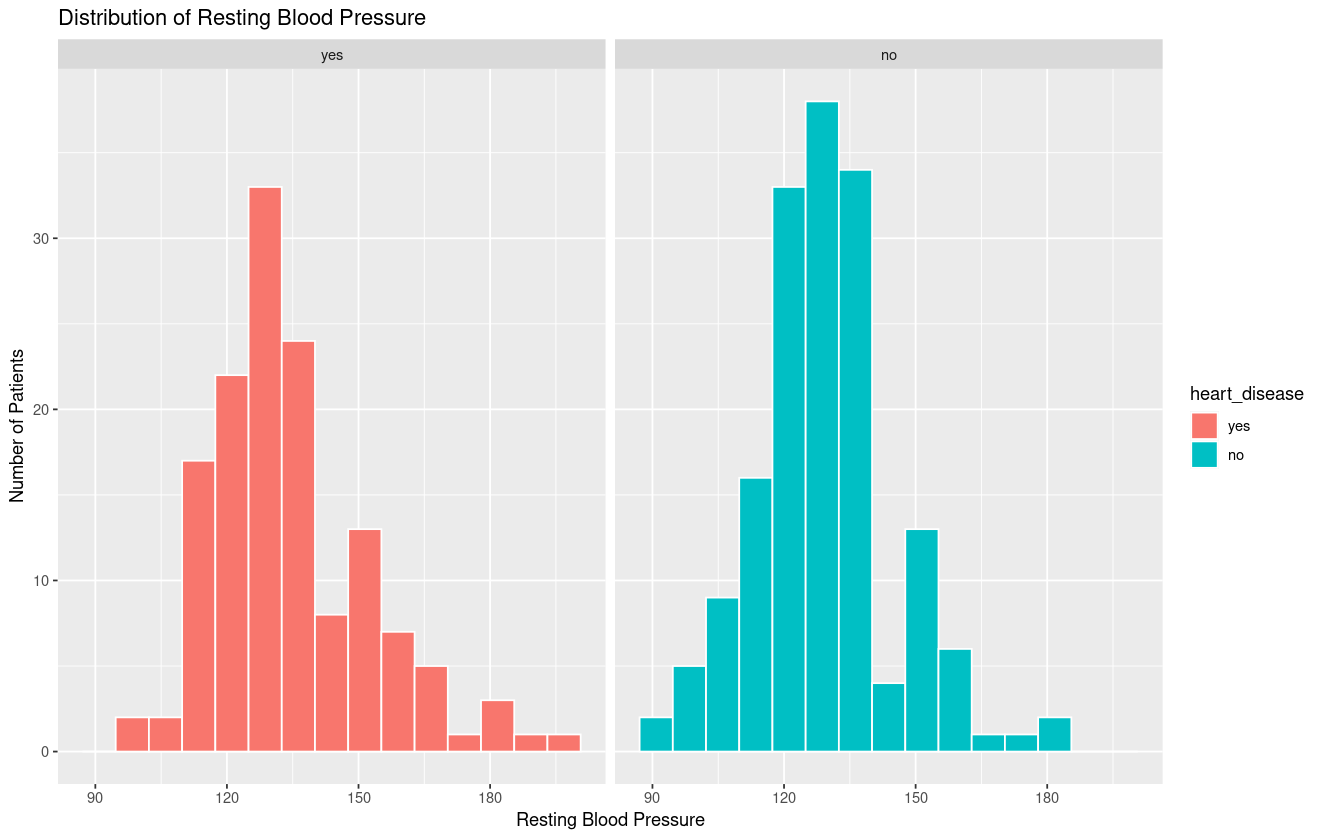

In [84]:
ggplot(data = heart_df, mapping = aes(x = resting_blood_pressure, fill = heart_disease)) +
       geom_histogram(color = "white", bins = 15) + 
       facet_wrap( ~ heart_disease, nrow = 1) +
       labs(title = "Distribution of Resting Blood Pressure",
            x = "Resting Blood Pressure",
            y = "Number of Patients")

<br>

We can use `facet_grid()` to add another variable to the visualization, `thalassemia`.

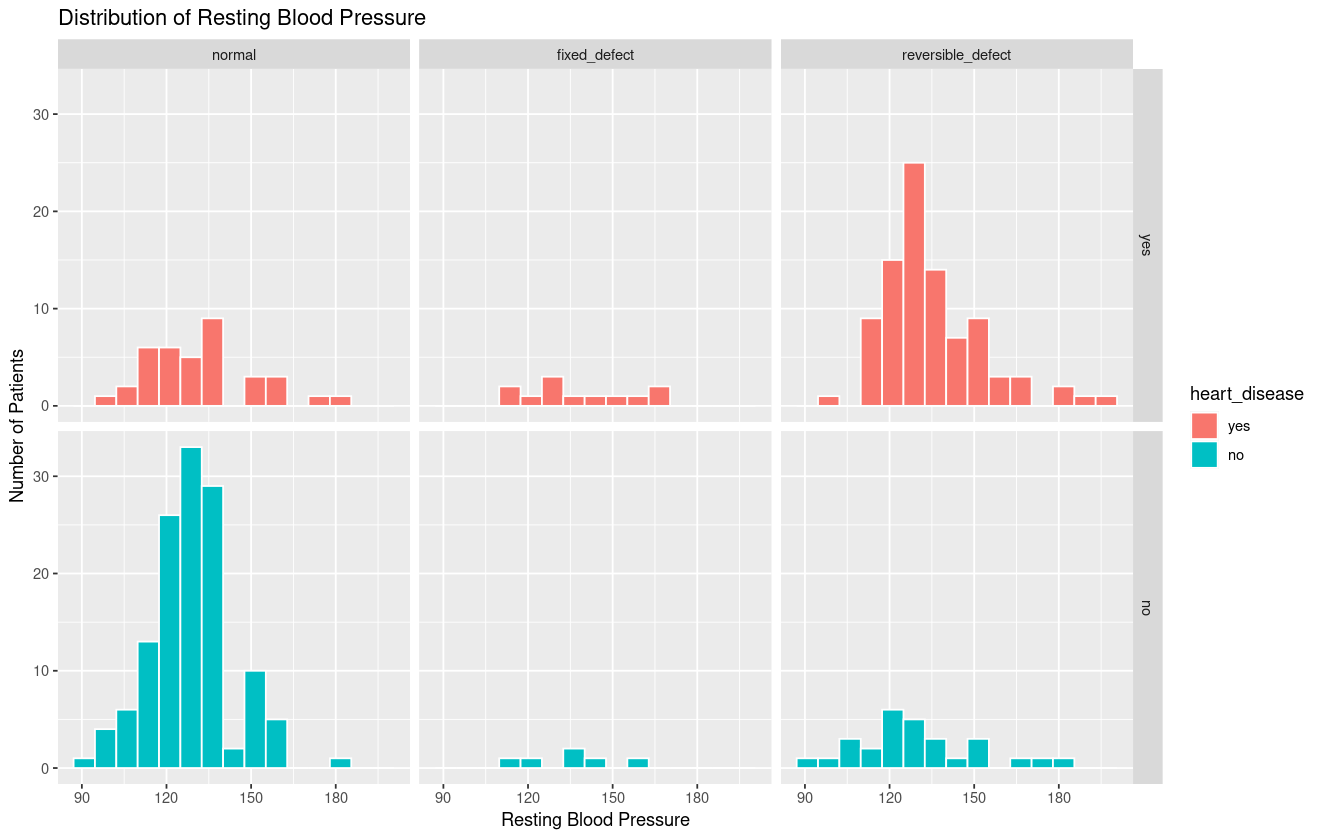

In [85]:
ggplot(data = heart_df, mapping = aes(x = resting_blood_pressure, fill = heart_disease)) +
       geom_histogram( color = "white", bins = 15) + 
       facet_grid(heart_disease ~ thalassemia) +
       labs(title = "Distribution of Resting Blood Pressure",
            x = "Resting Blood Pressure",
            y = "Number of Patients")

## Density Histograms

Density histograms are used to determine whether a particular theoretical probability density function is a good fit to model the dynamics of that variable in a population. Unlike regular histograms, which provide counts of a numeric variable for a series of bins, density histograms provide the **proportion** of observations falling within a series of bins.

To create a density histogram, use the same syntax as when creating a standard histogram, with the exception of adding `y = after_stat(density)` into the `aes()` option.

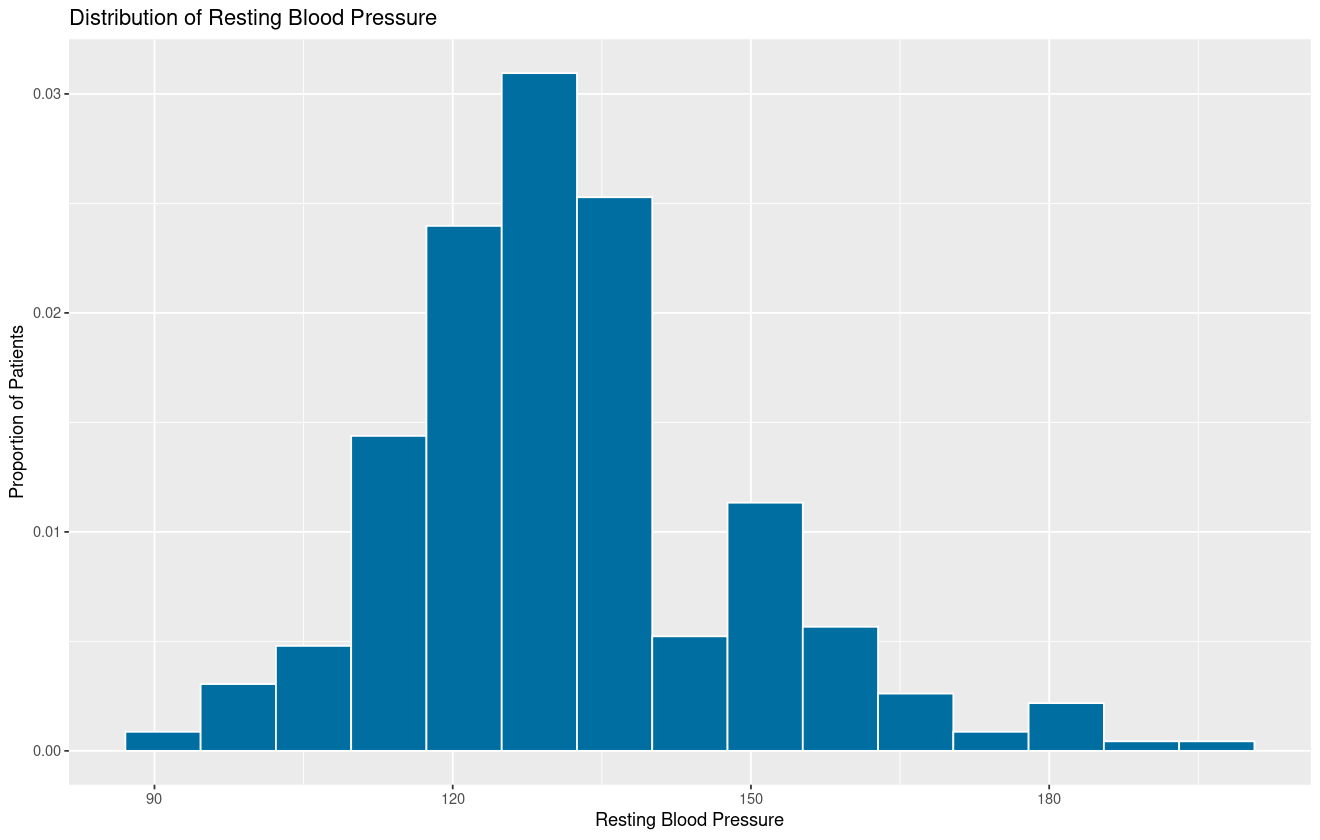

In [87]:
# Density histogram of resting_blood_pressure
ggplot(data = heart_df, mapping = aes(x = resting_blood_pressure, y = after_stat(density))) +
       geom_histogram(fill = "#006EA1", color = "white", bins = 15) + 
       labs(title = "Distribution of Resting Blood Pressure",
            x = "Resting Blood Pressure",
            y = "Proportion of Patients")

## Boxplots

Box plots are a powerful tool for exploring the central tendency and variability of numeric data by various levels of a factor or character. In the examples below, we will produce boxplots with `ggplot()`. 

The `geom` function used is `geom_boxplot()`. 

For boxplots, the `x` argument in `aes` should be a character or factor variable. The "Box" in boxplots represents the IQR (25th - 75th percentiles of data values).

In the next couple of examples, let's use the built-in data frame, `mpg` which has data on over 200 cars and their associated features such as city and highway miles per gallon. 

In [88]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


<br>

The boxplot below visualizes the distribution of `hwy` values by car `class`

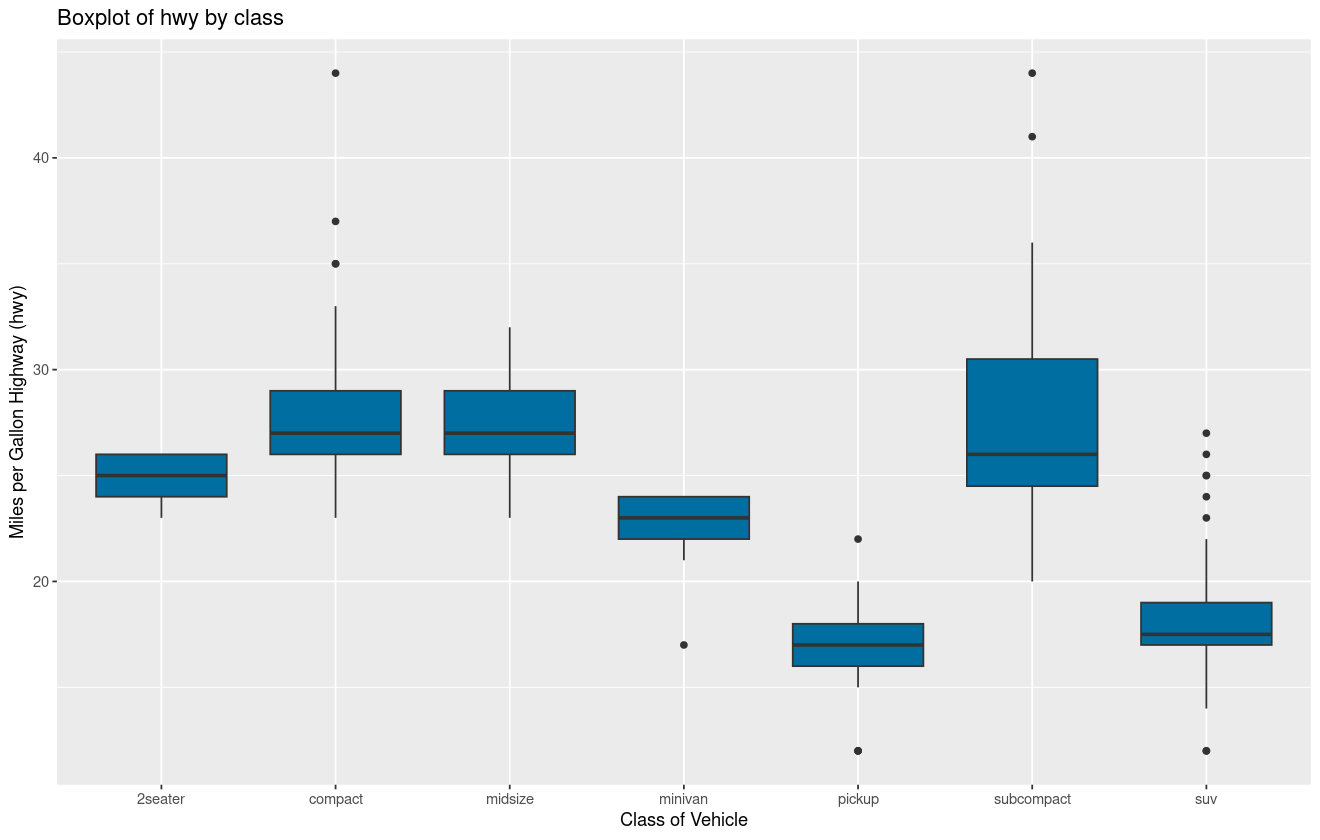

In [89]:
# Box plots of "hwy" variable by "class"
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot(fill = "#006EA1") +
  labs(title = "Boxplot of hwy by class", x = "Class of Vehicle",
       y = "Miles per Gallon Highway (hwy)")

<br>

 To color the boxplots by the level of a character or factor variable, we must add this to the aesthetic mapping `aes()`.
 
 In the example below, let's use the `reorder()` function to sort the categories on the x-axis. 
 
 The `reorder()` function takes an optional third argument, `FUN`, which is usually an aggregation function. 
 
 In the example below, we are reordering the `class` categories on the x-axis by the median value of `hwy` within each `class` category.

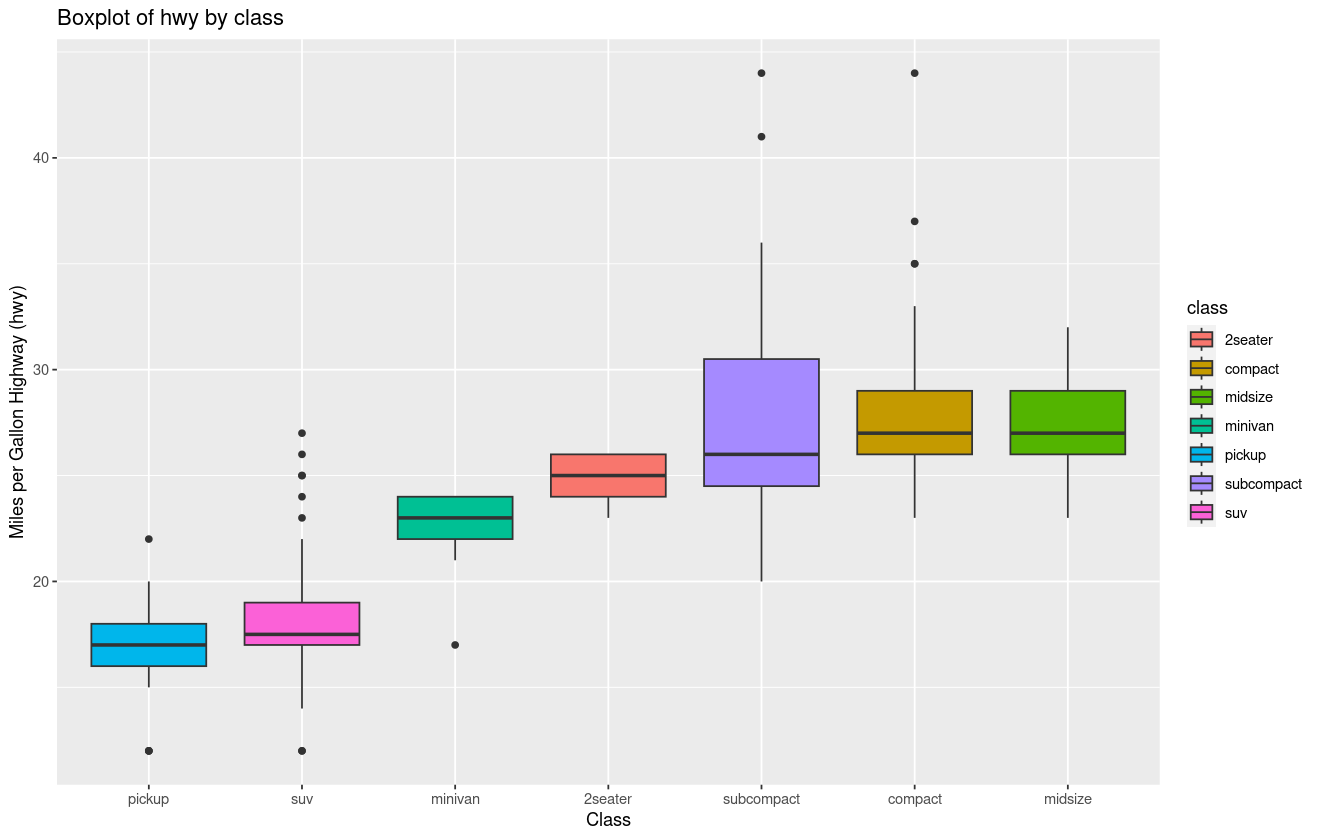

In [90]:
ggplot(data = mpg, mapping = aes(x = reorder(class, hwy, FUN = median), 
                                 y = hwy, fill = class)) +
  geom_boxplot() + 
  labs(title = "Boxplot of hwy by class",
       x = "Class", 
       y = "Miles per Gallon Highway (hwy)")

<br>


In cases where the factor of character variable has long labels, it is useful to use the `coord_flip()` function to switch the order of the axes in the plot. This is demonstrated below.

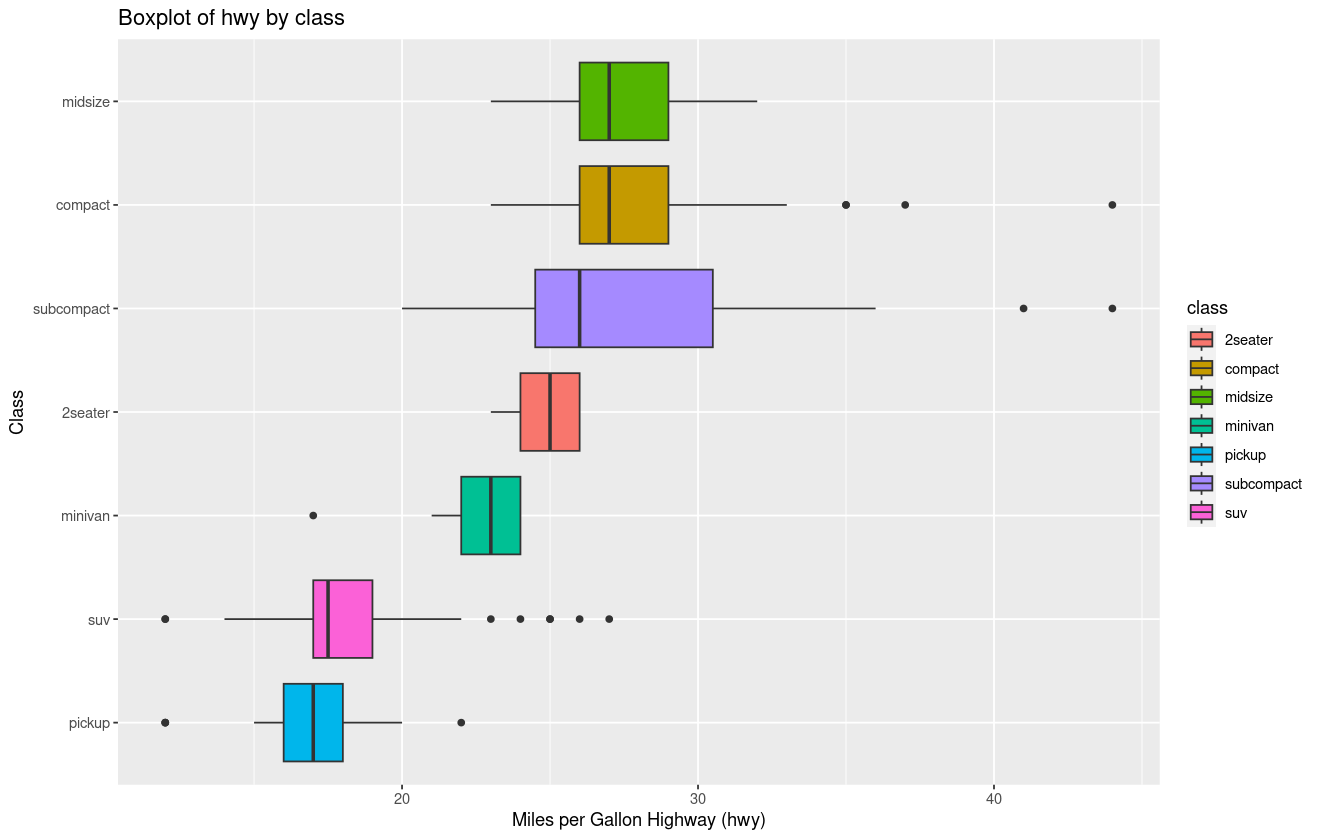

In [91]:
# Boxplot fill colors by "class" variable values and flip axes
ggplot(data = mpg, mapping = aes(x = reorder(class, hwy, FUN = median),
                                 y = hwy, fill = class)) +
  geom_boxplot() + 
  labs(title = "Boxplot of hwy by class", 
       x = "Class", y = "Miles per Gallon Highway (hwy)") + 
  coord_flip()

## Violin Plots With Data Points

A violin plot is another way to visualize numeric variables by character or factor categories to study the numeric value distributions. 

In `ggplot2`, the `geom_violin()` function produces these plots. It is similar to a box plot except that instead of displaying a box for the inter-quartile range (IQR), it display what's known as a `kernel density estimate`. 

A kernel density estimate is simply an estimated probability density function that is plotted along the vertical axis of the plot, symmetrically on both sides. 

The more this function sticks out (greater width), the more the original data points are located in that region of the y-axis.

This visualization is best combined with `geom_jitter()`, which overlays the original data points onto the vertical axis. The `width` argument gives the amount by which to scatter the data points and the `alpha` argument provides the level of color saturation (0.5 represents 50% of the completely filled data points).

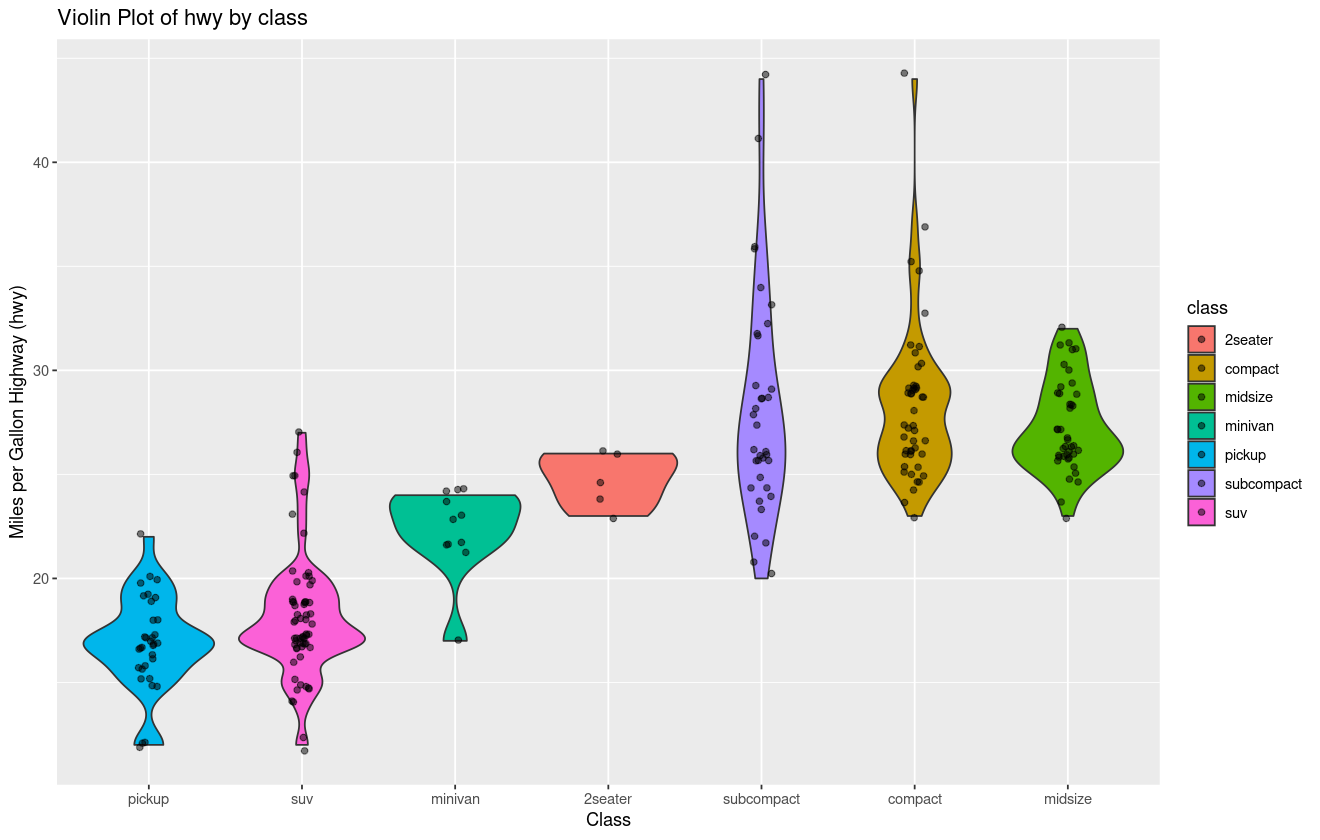

In [92]:
ggplot(data = mpg, mapping = aes(x = reorder(class, hwy, FUN = median), 
                                 y = hwy, fill = class)) +
  geom_violin() +  
  geom_jitter(width = 0.07, alpha = 0.5) +
  labs(title = "Violin Plot of hwy by class",
                        x = "Class", y = "Miles per Gallon Highway (hwy)")

## Line Charts

To create line charts, we use the `geom_line()` function.

Let's say we are interested in studying the average maximum heart rate (`max_heart_rate` variable) and by patient `age`. First, I will use `dplyr` to create a summary data frame with this information.

In [93]:
heart_summary <-  heart_df %>% group_by(age) %>% 
                  summarise(patients = n(),
                            avg_max_hr = mean(max_heart_rate)) %>% 
                  arrange(age) %>% 
                  filter(patients >= 5) # Keep Ages with at least 5 patients

<br>



In [94]:
# Let's take a look at the results
heart_summary

age,patients,avg_max_hr
<int>,<int>,<dbl>
41,10,164.7000
42,8,160.2500
43,8,154.8750
44,11,168.8182
45,8,155.8750
46,7,150.1429
47,5,149.6000
48,7,166.2857
49,5,152.2000


### Simple Line Chart

Let's plot a line chart with `avg_max_hr` on the y-axis and `age` on the x-axis

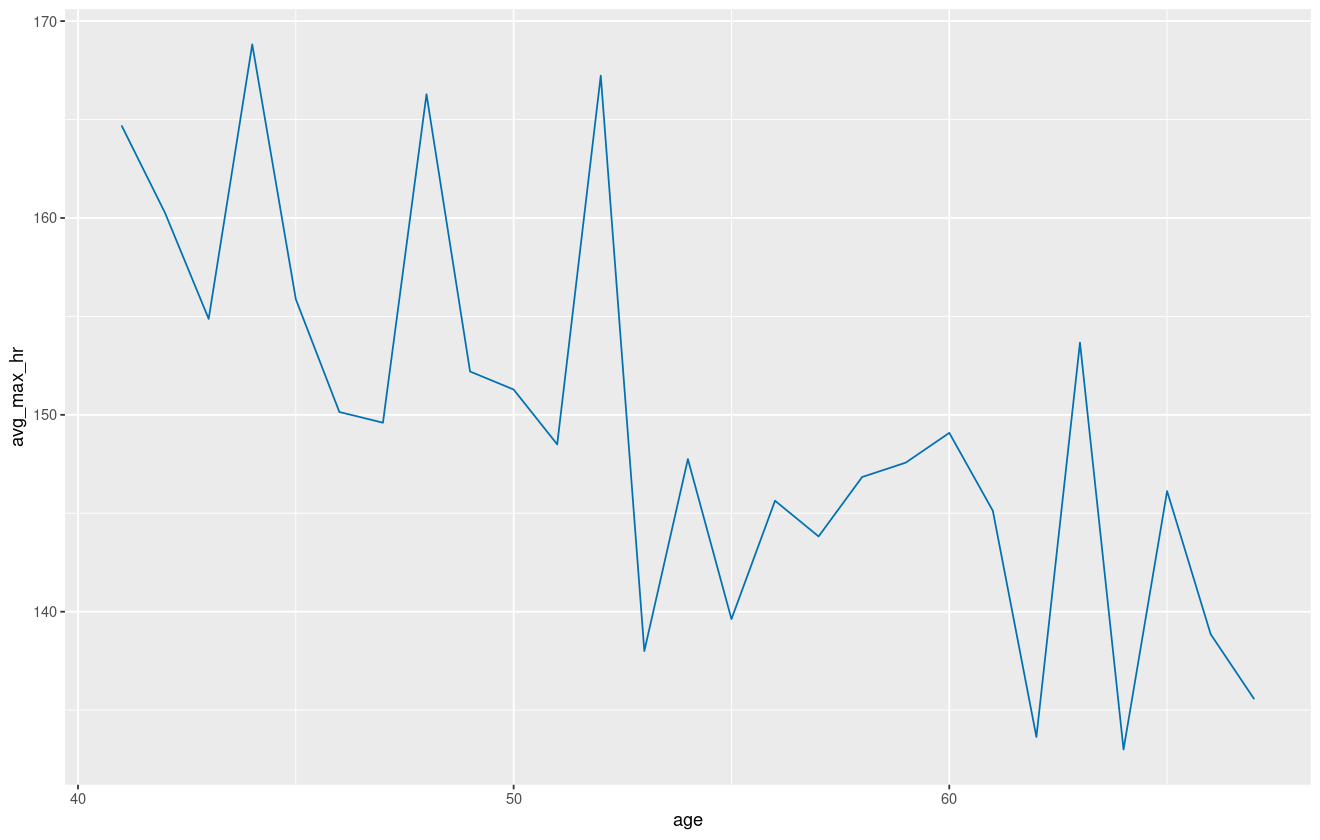

In [95]:
ggplot(data = heart_summary, mapping = aes(x = age, y = avg_max_hr)) +
       geom_line(color = "#0072B2")

<br>

Now let's include points in the line chart

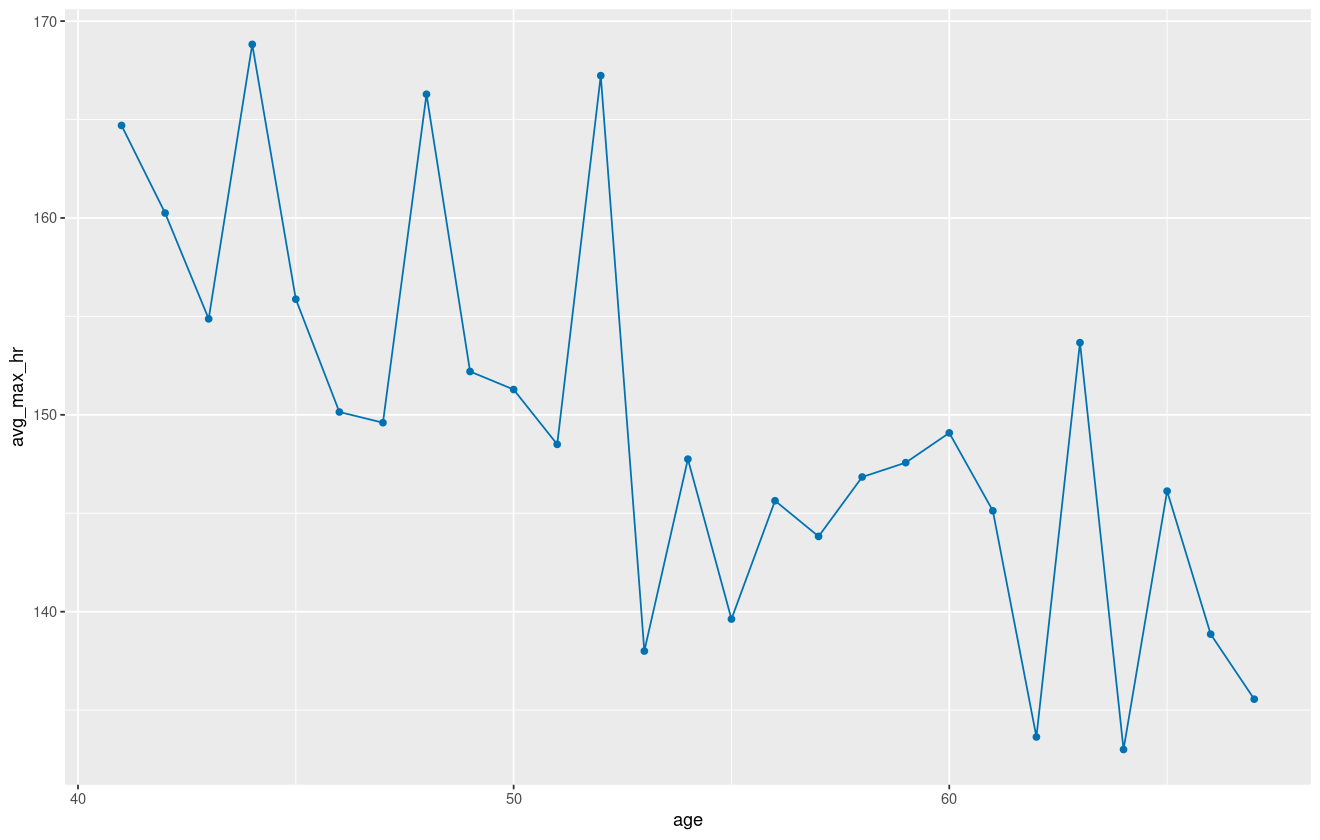

In [96]:
ggplot(data = heart_summary, mapping = aes(x = age, y = avg_max_hr)) +
       geom_line(color = "#0072B2") +
       geom_point(color = "#0072B2")

<br>

Finally, if you are not a fan of the default grey background in `ggplot2`, just add `theme_light()` to the end of any plot. There are many more themes available in `ggplot2`, such as theme_bw(), or theme_classic(). Feel free to experiment with them.

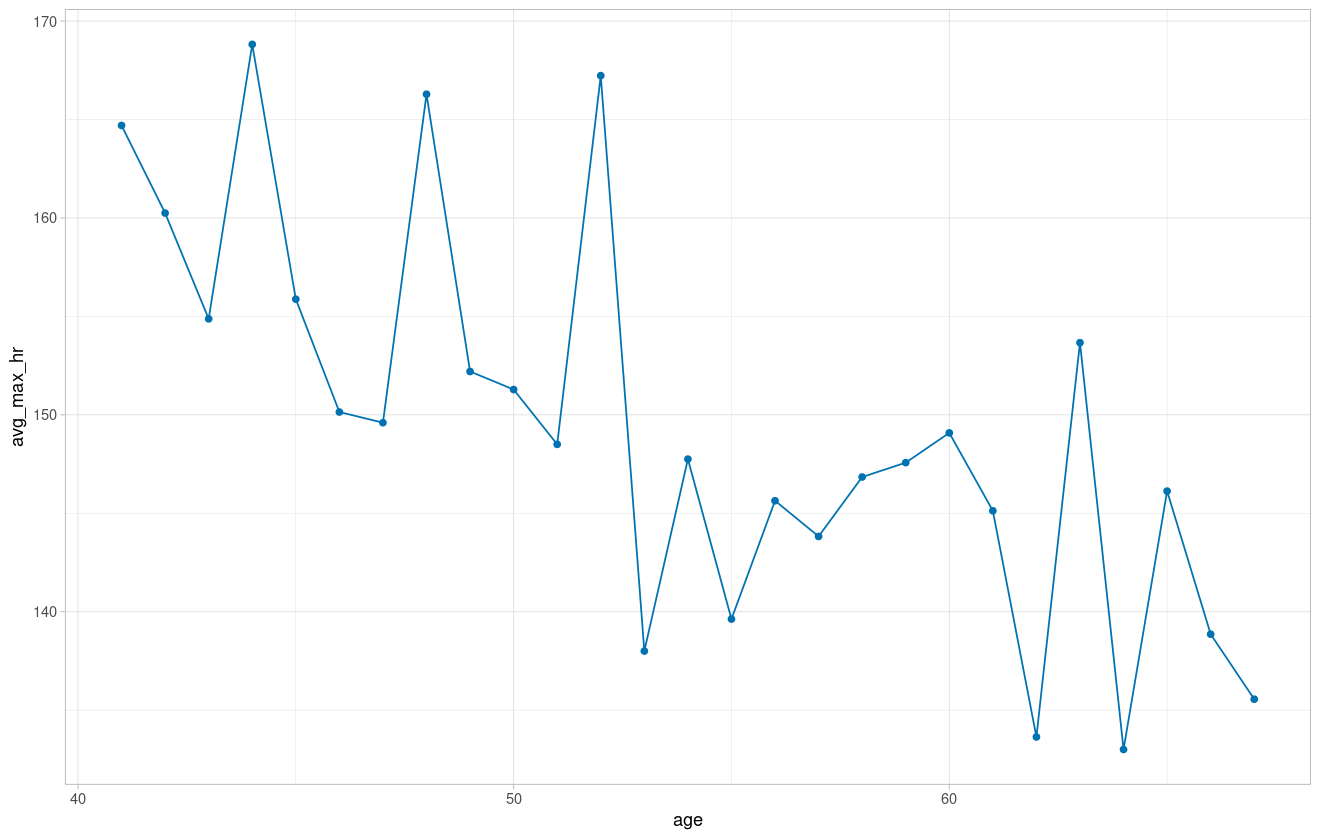

In [97]:
ggplot(data = heart_summary, mapping = aes(x = age, y = avg_max_hr)) +
  geom_line(color = "#0072B2") +
  geom_point(color = "#0072B2") +
  theme_light()

## Learning More
To learn more about the advanced data visualization capabilities of `ggplot2` please see the [ggplot2 documentation](https://ggplot2.tidyverse.org/)